# 1. Introducation

The correct assessment for credit card approval is very important for banks and organisations who lend a credit card to the people. The recent years have seen a huge growth in credit cards and loans. The exact judgement of person to be approved for credit cards allows the organisations to minimize losses and the same time make suitable credit arrangements as per requirement. Due to the huge growth in the number of applicants, there is a need for a more sophisticated method to automate the process and speed it up.

Credit card approval can be beneficial for organisations that lend credit cards, and due to increase in a huge number of the applicant, there is need to automate the task and classify the applicants into if they are eligible for a credit card or not. This helps to avoid organisation losses by avoiding potential defaulters. Here we are not just looking into bank balance but into there personal attributes like gender, married, age, Occupation etc. We account for these personal attributes to evaluate if the given applicant is a good customer. This can also help cut down the weeks-long process into a few days. This gives benefit by cutting down costs on credit analysis and faster credit decisions.

# Data 


## THE PROBLEM & GOAL

### Problem:

#### Credit score cards are a common risk control method in the financial industry.It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings.The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.This is important because it can be risky to issue credit cards to customers who are likely to default on their payments.

#### Goal:

Build a machine learning model to predict if an applicant is 'good' or 'bad' client
These details (features we will use to predict) are as follows:


Features name: (Credit_Card.csv)

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size


Another data set (Credit_card_label.csv) contains two key pieces of information

ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected. 



# Proposal 
> credit card issuers face increasing competition and tighter regulatory requirements, making it essential to identify creditworthy clients while minimizing risk.

> predicting a good client is crucial for banks to remain competitive and profitable in today's world.

> Machine learning can help issuers achieve this goal by providing more accurate and efficient methods for credit scoring, fraud detection, and risk management.

# Impact On banking sector

>Improved Decision-making: Machine learning can help banks to make better-informed decisions about lending, risk management, and fraud detection. This can improve the bank's profitability and reduce losses.

>Increased Efficiency: By automating many of the processes involved in credit card approval and risk management, machine learning can help banks to increase efficiency and reduce costs.

>Enhanced Customer Experience: Machine learning can help banks to provide a more personalized and relevant customer experience by tailoring credit card offers and other services to individual customers' needs and preferences.

>Greater Accuracy: Machine learning algorithms can analyze large amounts of data quickly and accurately, providing banks with more accurate insights into customer behavior and creditworthiness.

>Enhanced Security: By detecting and preventing fraudulent activity in real-time, machine learning can help banks to improve security and reduce the risk of losses due to fraud.

# Importing the libraries and data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [2]:
# data preprocessing

from sklearn.preprocessing import StandardScaler

# data splitting

from sklearn.model_selection import train_test_split

# data modeling

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




In [3]:
# data evaluation matrix

from scipy import stats
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Extracting data using two data sources

In [4]:
# import the data from csv file
data=pd.read_csv('Credit_card.csv')
label=pd.read_csv('Credit_card_label.csv')

# shape of data
data.shape,label.shape

((1548, 18), (1548, 2))

Using different methods to understand data

data is complex and both dataset need some kind of transformation before analysis

datasets are compiled using joins

In [5]:
# join the two datasets
data=data.join(label.set_index('Ind_ID'),on='Ind_ID')

In [6]:
# shape of whole dataset
data.shape

(1548, 19)

In [7]:
# check the label data is balance or not

data['label'].value_counts()

0    1373
1     175
Name: label, dtype: int64

 data is imbalanced

In [8]:
# data 1st 5 records
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [9]:
# data and data types
data.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [10]:
# to check data type  read correctly or not
for i in data.columns:
    print(i,'  --',data[i].dtype,'--    ',data[i].unique()[:5])
    

Ind_ID   -- int64 --     [5008827 5009744 5009746 5009749 5009752]
GENDER   -- object --     ['M' 'F' nan]
Car_Owner   -- object --     ['Y' 'N']
Propert_Owner   -- object --     ['Y' 'N']
CHILDREN   -- int64 --     [0 1 2 4 3]
Annual_income   -- float64 --     [180000. 315000.     nan 450000.  90000.]
Type_Income   -- object --     ['Pensioner' 'Commercial associate' 'Working' 'State servant']
EDUCATION   -- object --     ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
Marital_status   -- object --     ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Housing_type   -- object --     ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment']
Birthday_count   -- float64 --     [-18772. -13557.     nan -22134. -18173.]
Employed_days   -- int64 --     [365243   -586   -678  -1002   -913]
Mobile_phone   -- int64 --     [1]
Work_Phone   -- int64 --     [0 1]
Phone   -- i

In [11]:
# to check how many features dataset have 
for i in data.columns:
    print('number of cat  {0} : {1} '.format( i ,data[i].value_counts().count()))

number of cat  Ind_ID : 1548 
number of cat  GENDER : 2 
number of cat  Car_Owner : 2 
number of cat  Propert_Owner : 2 
number of cat  CHILDREN : 6 
number of cat  Annual_income : 115 
number of cat  Type_Income : 4 
number of cat  EDUCATION : 5 
number of cat  Marital_status : 5 
number of cat  Housing_type : 6 
number of cat  Birthday_count : 1270 
number of cat  Employed_days : 956 
number of cat  Mobile_phone : 1 
number of cat  Work_Phone : 2 
number of cat  Phone : 2 
number of cat  EMAIL_ID : 2 
number of cat  Type_Occupation : 18 
number of cat  Family_Members : 7 
number of cat  label : 2 


In [12]:
# to check  dataset have duplicates or not
data.duplicated().sum()

0

In [13]:
# data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [14]:
#data summary
data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [15]:
# to check dataset have null values or not
data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [16]:
# percentage of null values

for i in data.columns:
    #print(i,np.round(data[i].isnull().mean()*100,3))
    print('number of null values in percentage%   {0} : {1} '.format( i ,np.round(data[i].isnull().mean()*100,3)))

number of null values in percentage%   Ind_ID : 0.0 
number of null values in percentage%   GENDER : 0.452 
number of null values in percentage%   Car_Owner : 0.0 
number of null values in percentage%   Propert_Owner : 0.0 
number of null values in percentage%   CHILDREN : 0.0 
number of null values in percentage%   Annual_income : 1.486 
number of null values in percentage%   Type_Income : 0.0 
number of null values in percentage%   EDUCATION : 0.0 
number of null values in percentage%   Marital_status : 0.0 
number of null values in percentage%   Housing_type : 0.0 
number of null values in percentage%   Birthday_count : 1.421 
number of null values in percentage%   Employed_days : 0.0 
number of null values in percentage%   Mobile_phone : 0.0 
number of null values in percentage%   Work_Phone : 0.0 
number of null values in percentage%   Phone : 0.0 
number of null values in percentage%   EMAIL_ID : 0.0 
number of null values in percentage%   Type_Occupation : 31.525 
number of null

<AxesSubplot:>

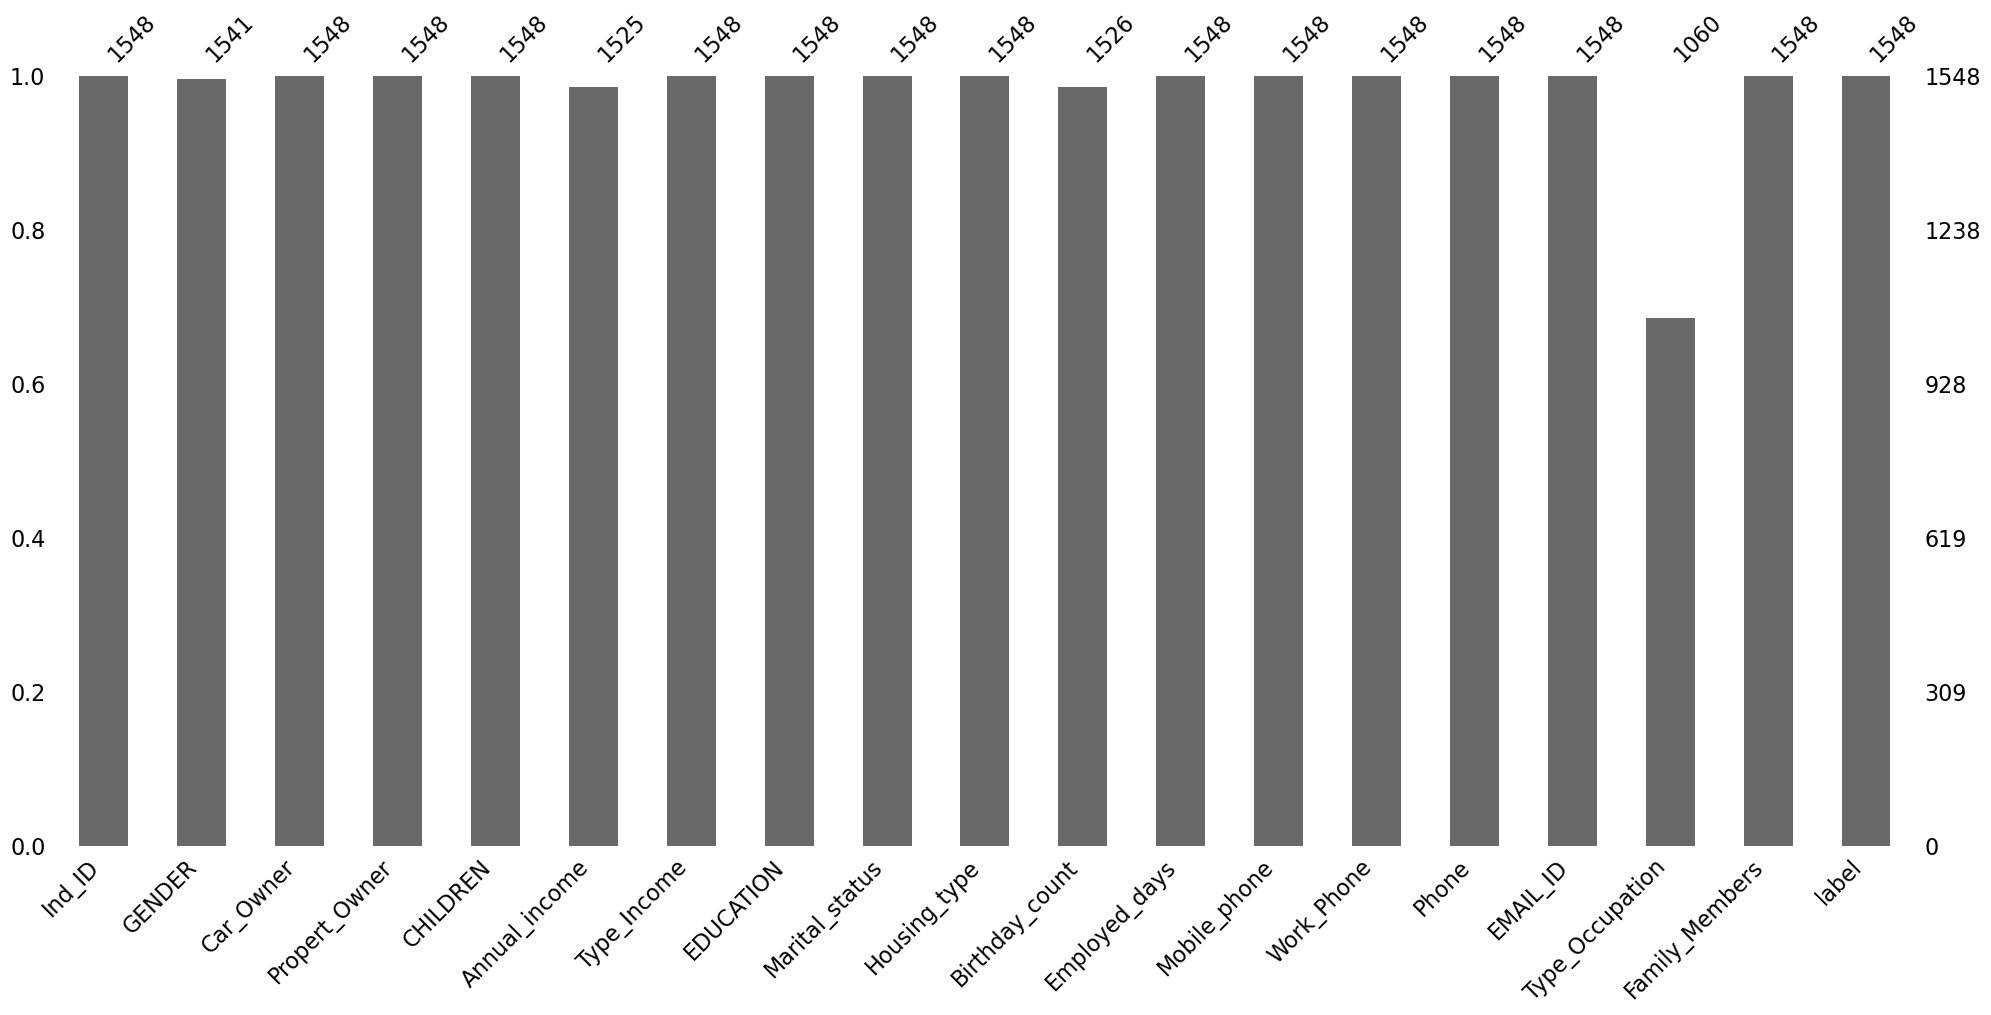

In [17]:
# to visualize null values

import missingno as msg

msg.bar(data)

<AxesSubplot:>

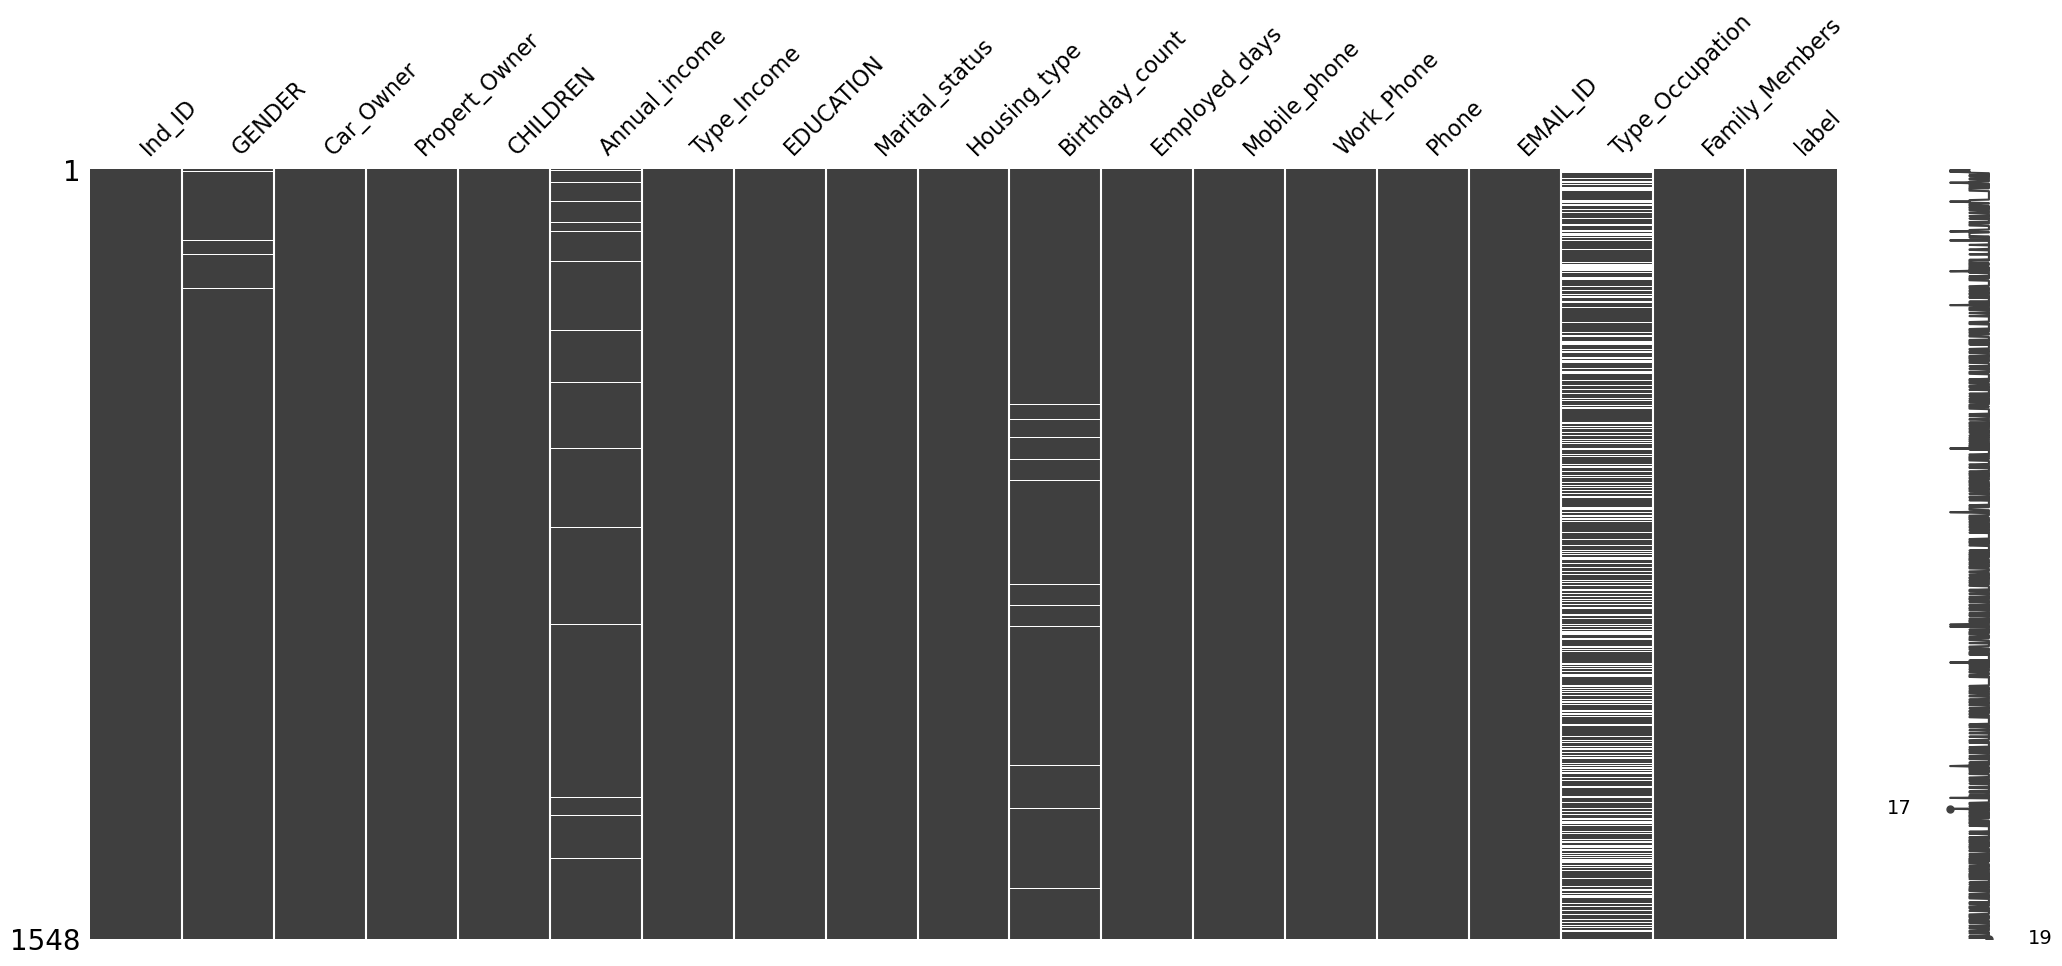

In [18]:
# check any relations between null values
msg.matrix(data)

<AxesSubplot:>

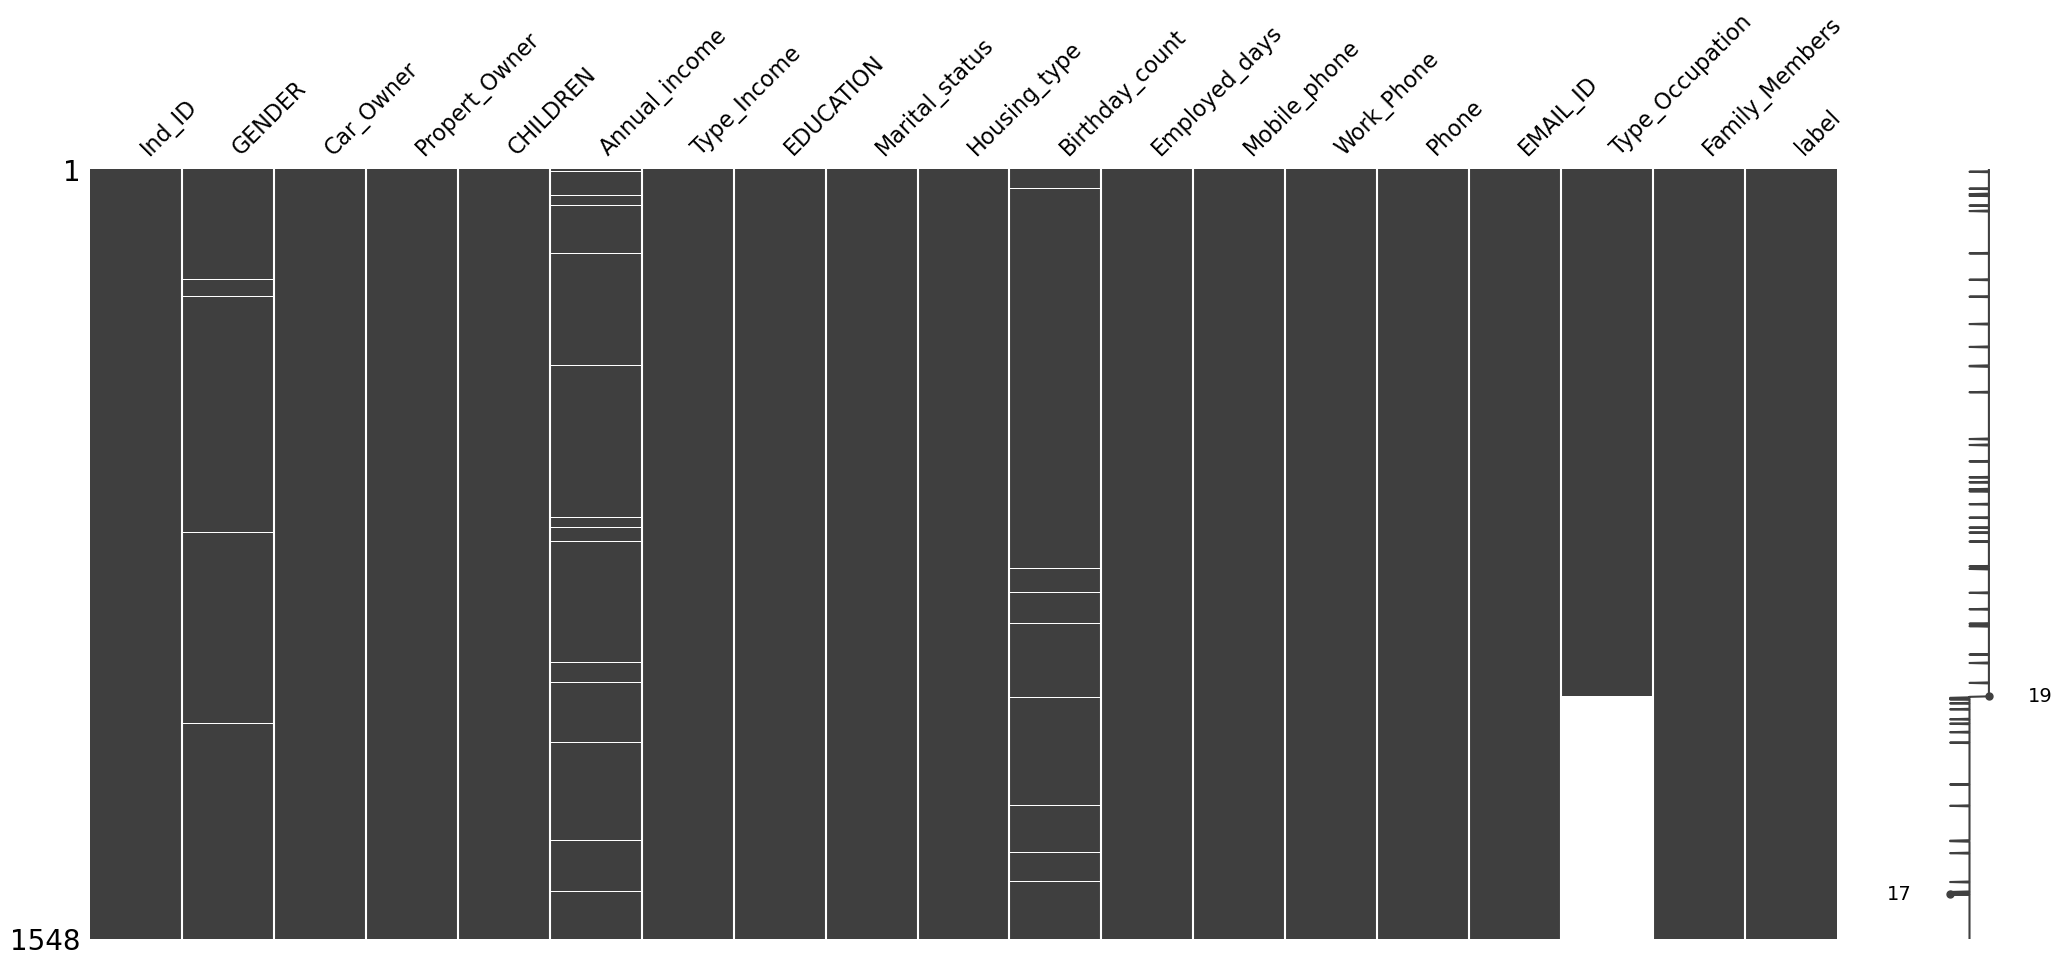

In [19]:
# check Type_Occupation feature have any relations with other null values
sorte=data.sort_values('Type_Occupation')
msg.matrix(sorte)

<AxesSubplot:>

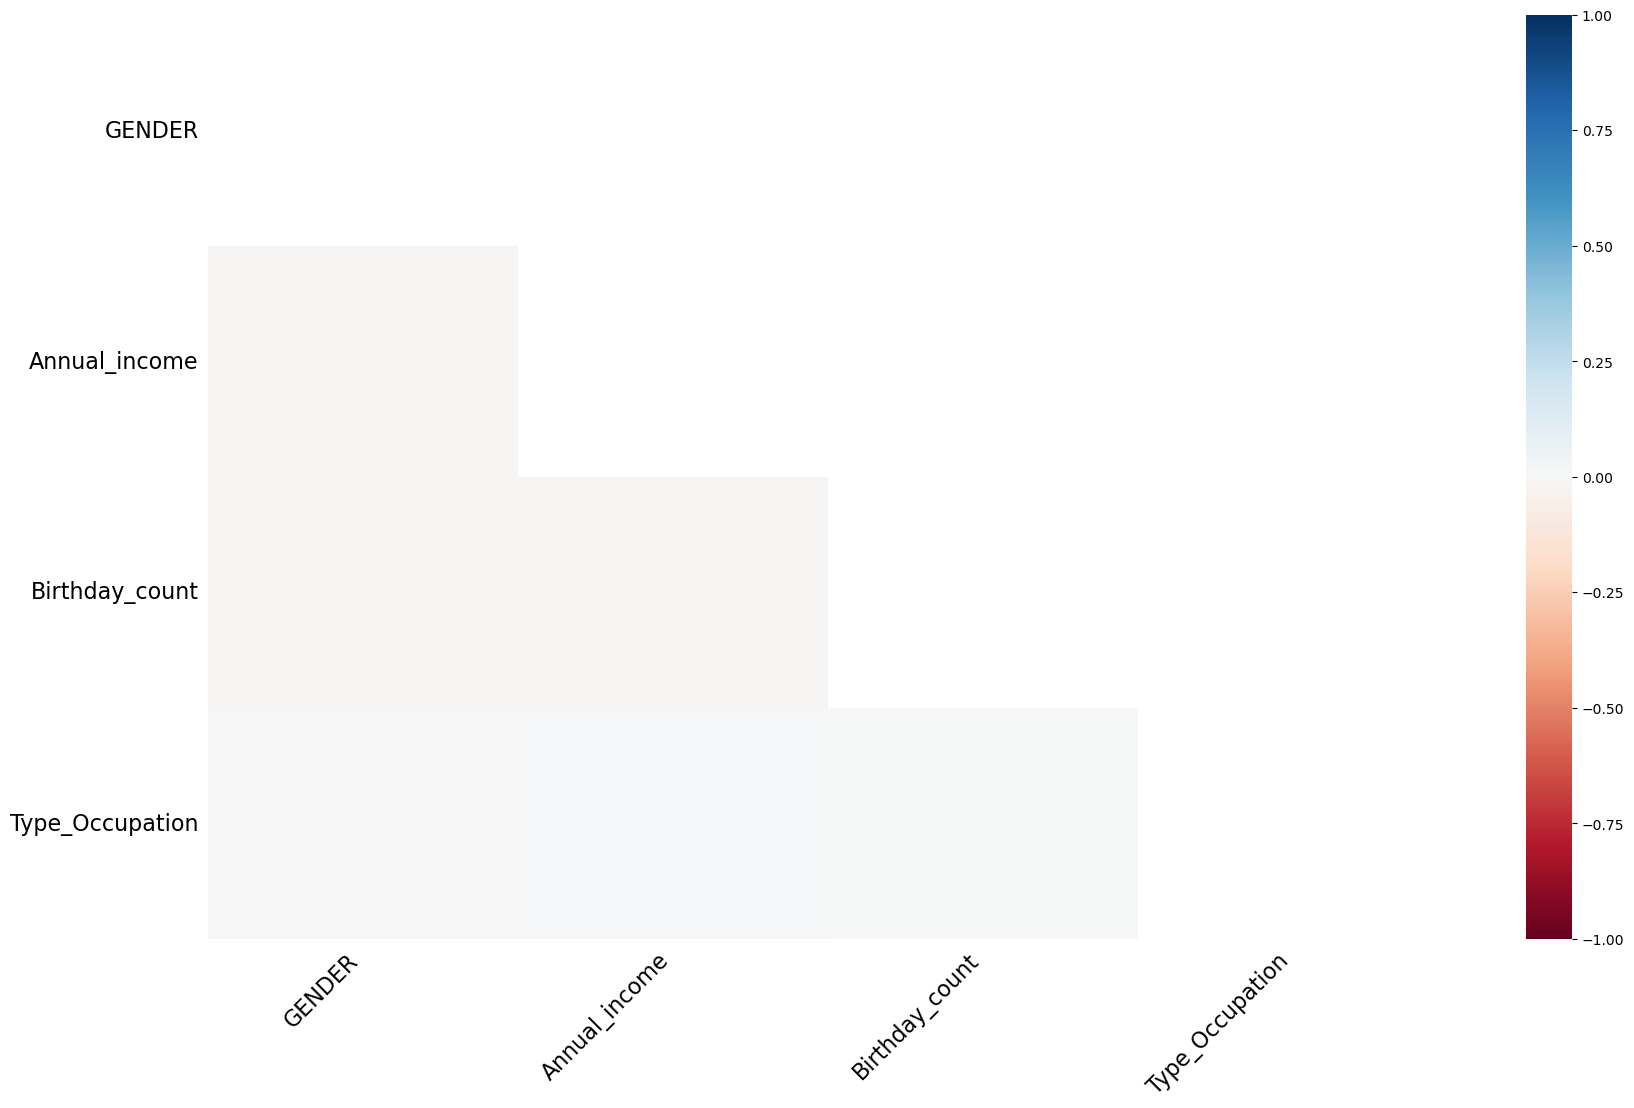

In [20]:
# check correation between null values
msg.heatmap(data)

In [21]:
# create new column and check Type_Occupation have relation between label data
data['Type_Occupation_null']=np.where(data['Type_Occupation'].isnull(),1,0)
data["Type_Occupation_null"].mean()

0.3152454780361757

In [22]:
# check Type_Occupation have relation between label data or not
data.groupby('label')['Type_Occupation_null'].mean()

label
0    0.313911
1    0.325714
Name: Type_Occupation_null, dtype: float64

In [23]:
# shape of data
data.shape

(1548, 20)

# Handling the null values

In [24]:
# replace null values with mode,median

data['GENDER'].fillna(data['GENDER'].mode()[0],inplace=True)
data['Annual_income'].fillna(data['Annual_income'].median(),inplace=True)
data['Birthday_count'].fillna(data['Birthday_count'].median(),inplace=True)

In [25]:
# drop the Type_Occupation and Type_Occupation_null
data.drop(columns=['Type_Occupation'],axis=1,inplace=True)
data.drop(columns=['Type_Occupation_null'],axis=1,inplace=True)

In [26]:
# check null values
data.isnull().sum()


Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

In [27]:
# shape of data
data.shape

(1548, 18)

# clean data to import the mysql data base

In [28]:
# create the database in mysql 

from sqlalchemy import create_engine

username = 'root'
password = 'mani'
hostname = 'localhost'

new_database = 'Credit_card'

try:
    # Set up a connection to the MySQL server
    engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{hostname}')
    
    # Create the new database
    engine.execute(f"CREATE DATABASE {new_database}")

except Exception as e:
    print(f'Error: {e}')

finally:
    # Close the engine
    engine.dispose()


In [29]:
# Uplode Data to Database

try:
    # Set up a connection to the MySQL server
    engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{hostname}/{new_database}')
    
    # Uplode Data to Database
    data.to_sql('data', engine)

except Exception as e:
    print(f'Error: {e}')

finally:
    # Close the engine
    engine.dispose()


In [30]:
# drop the Ind_ID feature

data.drop(columns=['Ind_ID'],axis=1,inplace=True)

In [31]:
# identify the numerical_features,catgorical_features,discrete_feature,countinue_feature

numerical_features=data.select_dtypes(exclude='object')
catgorical_features=data.select_dtypes(include='object')
discrete_feature=[fea for fea in numerical_features if len(data[fea].unique())<25]
countinue_feature=[fea for fea in numerical_features if fea not in discrete_feature]


In [33]:
# create the function to identify the outliers

def check(df,variable):
    for i in variable :
        plt.figure(figsize=(16,4))

        plt.subplot(1,3,1)
        plt.hist(df[i],bins=30)
        plt.title(i+' histogram')

        plt.subplot(1,3,2)
        stats.probplot(df[i],dist='norm',plot=plt)
        plt.title(i+' Q_Q_plot')

        plt.subplot(1,3,3)
        sns.boxplot(y=df[i])
        plt.title(i+'Box_plot')

        plt.show()

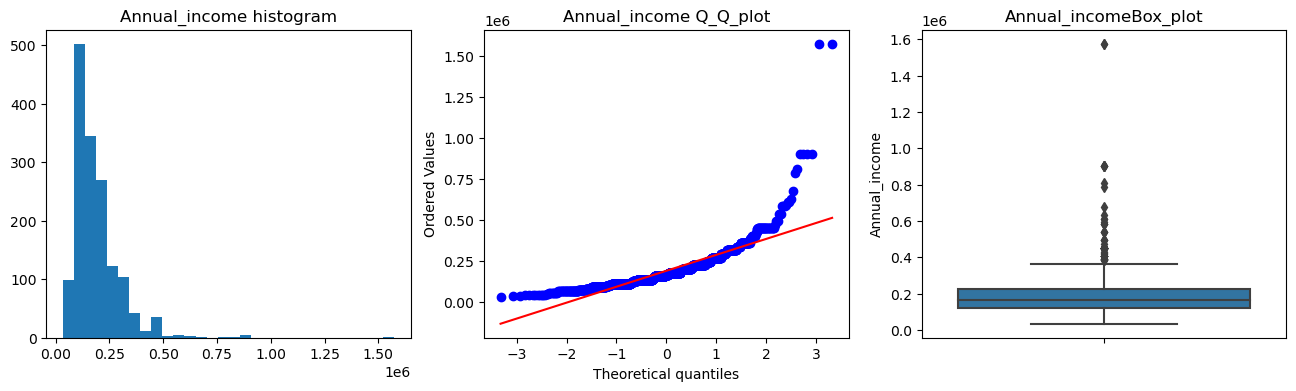

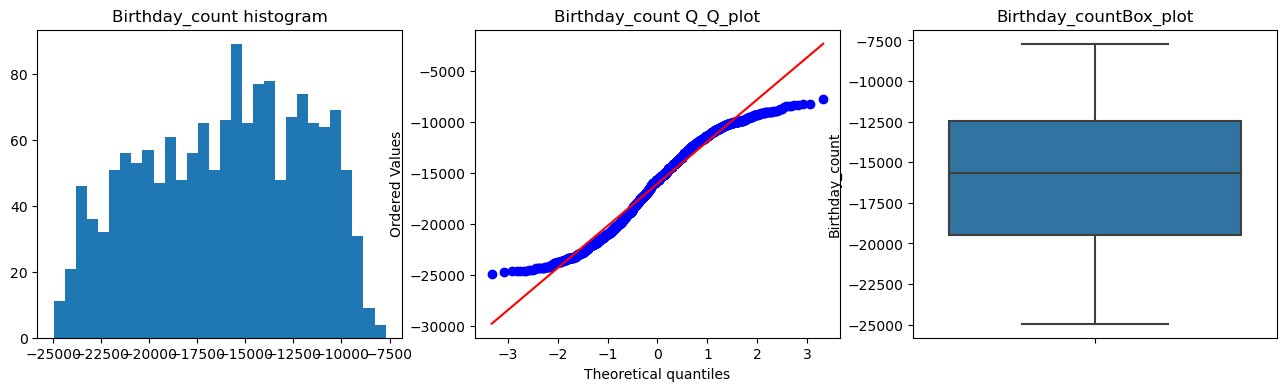

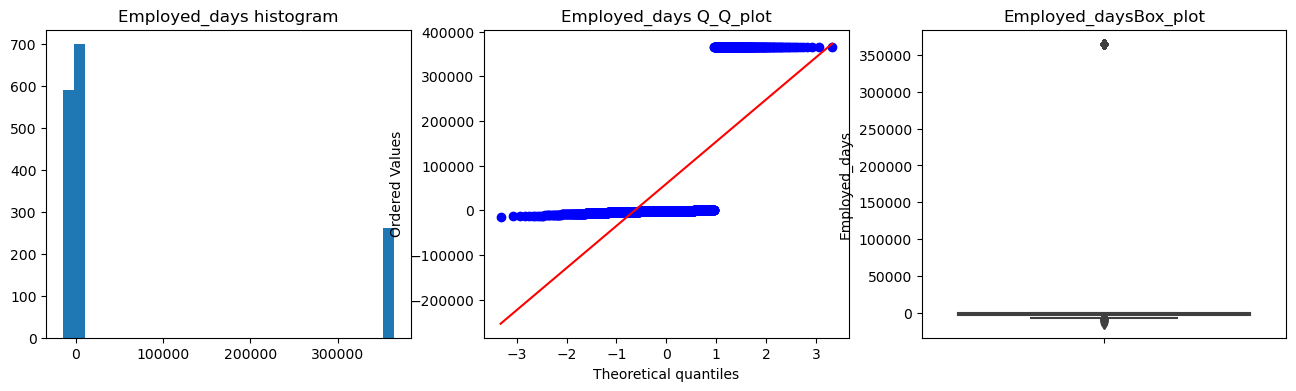

In [34]:
# identify the outliers

check(data,countinue_feature)

# Exploratory data analysis

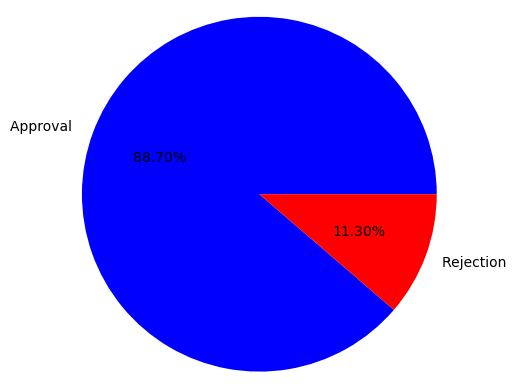

In [35]:
# visualize the label data
plt.pie(data['label'].value_counts(),labels=['Approval ','Rejection '],colors=['Blue','Red'],autopct='%1.2f%%',radius=1.2);

# 1.Gender

In [36]:
# visualize the Gender feature and relation with label data
data['GENDER'].value_counts()

F    980
M    568
Name: GENDER, dtype: int64

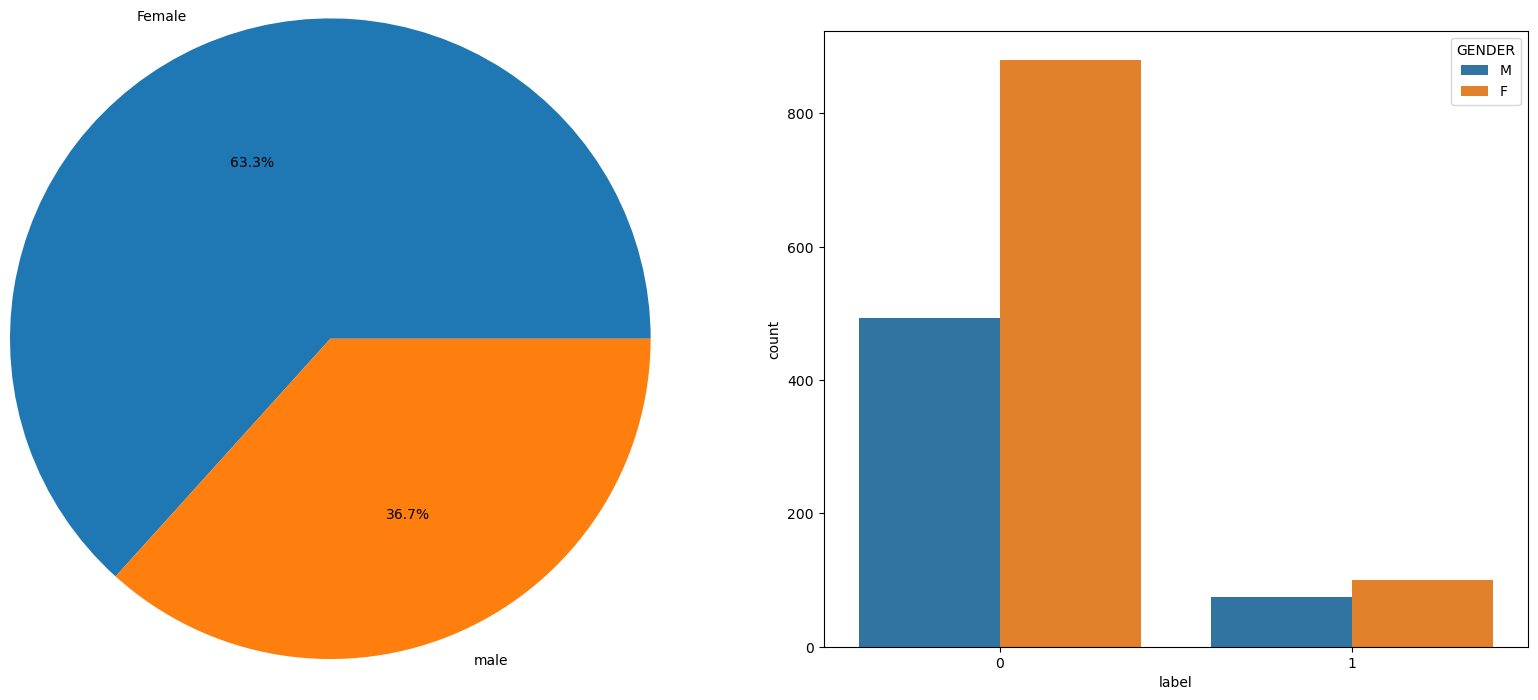

In [37]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.pie(data['GENDER'].value_counts(),labels=['Female','male'],autopct='%1.1f%%',radius=1.3);
plt.subplot(1,2,2)
sns.countplot(data=data,x='label',hue='GENDER')
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

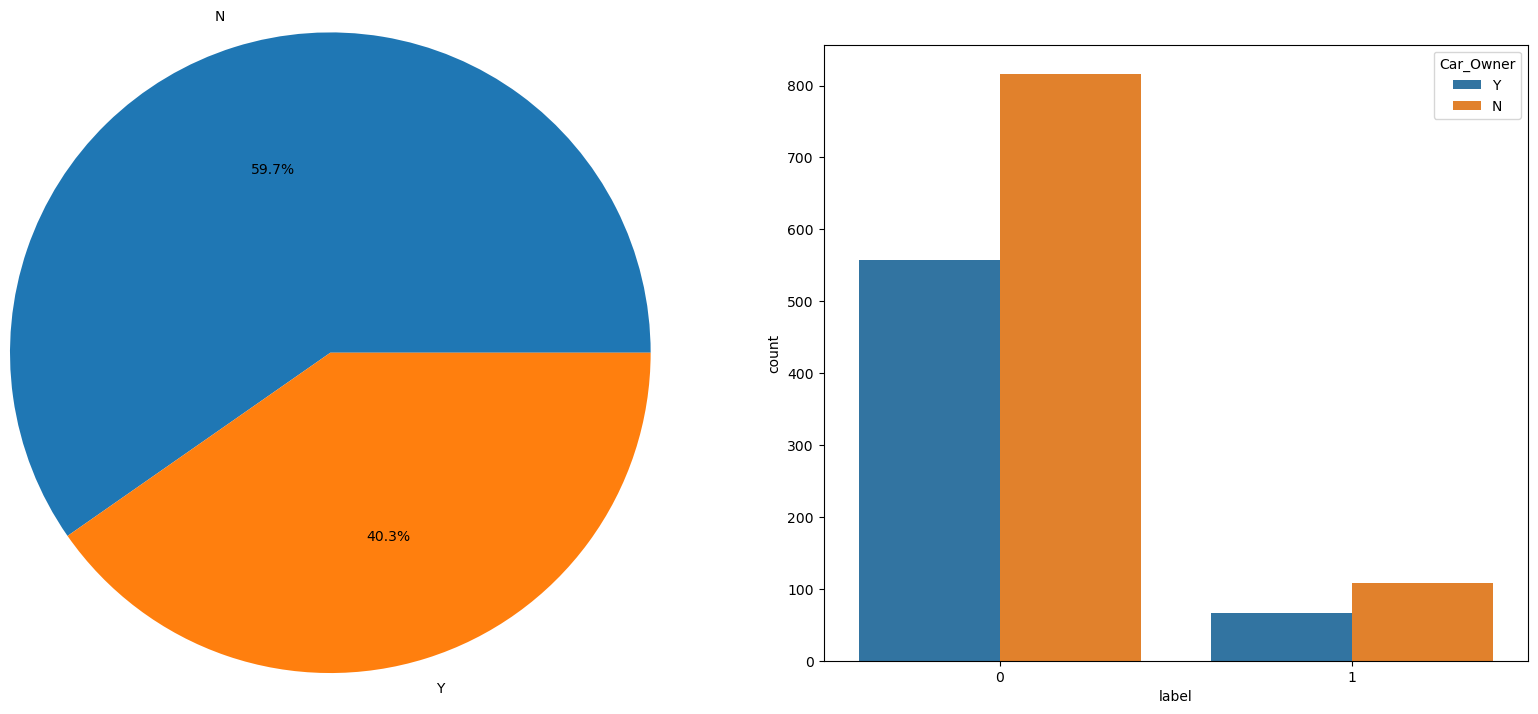

In [38]:
# visualize the Car_Owner feature and relation with label data

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.pie(data['Car_Owner'].value_counts(),labels=data['Car_Owner'].value_counts().index,autopct='%1.1f%%',radius=1.3);
plt.subplot(1,2,2)
sns.countplot(data=data,x='label',hue='Car_Owner')


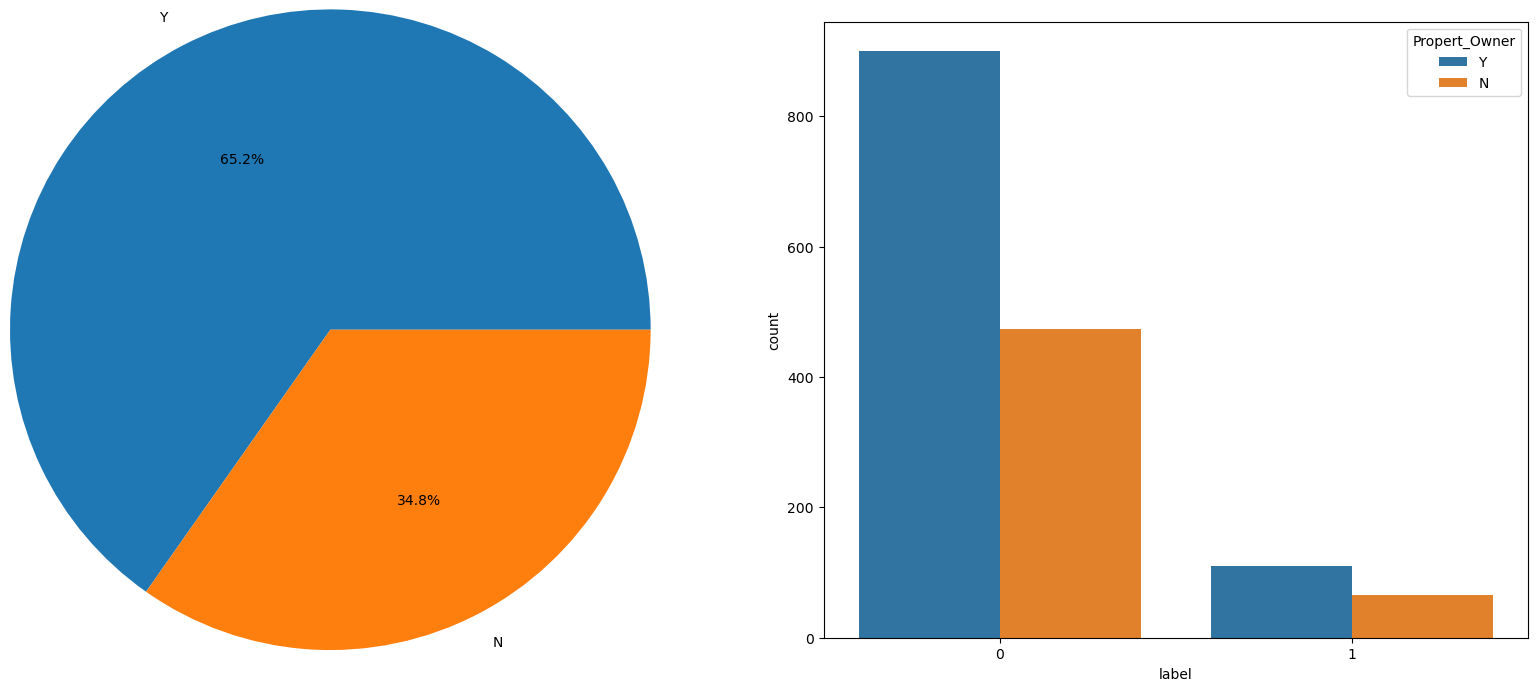

In [39]:
# visualize the Propert_Owner feature and relation with label data

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.pie(data['Propert_Owner'].value_counts(),labels=data['Propert_Owner'].value_counts().index,autopct='%1.1f%%',radius=1.3);
plt.subplot(1,2,2)
sns.countplot(data=data,x='label',hue='Propert_Owner')

plt.show()

In [ ]:
# visualize the CHILDREN feature and relation with label data

In [40]:
data['CHILDREN'].value_counts()

0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

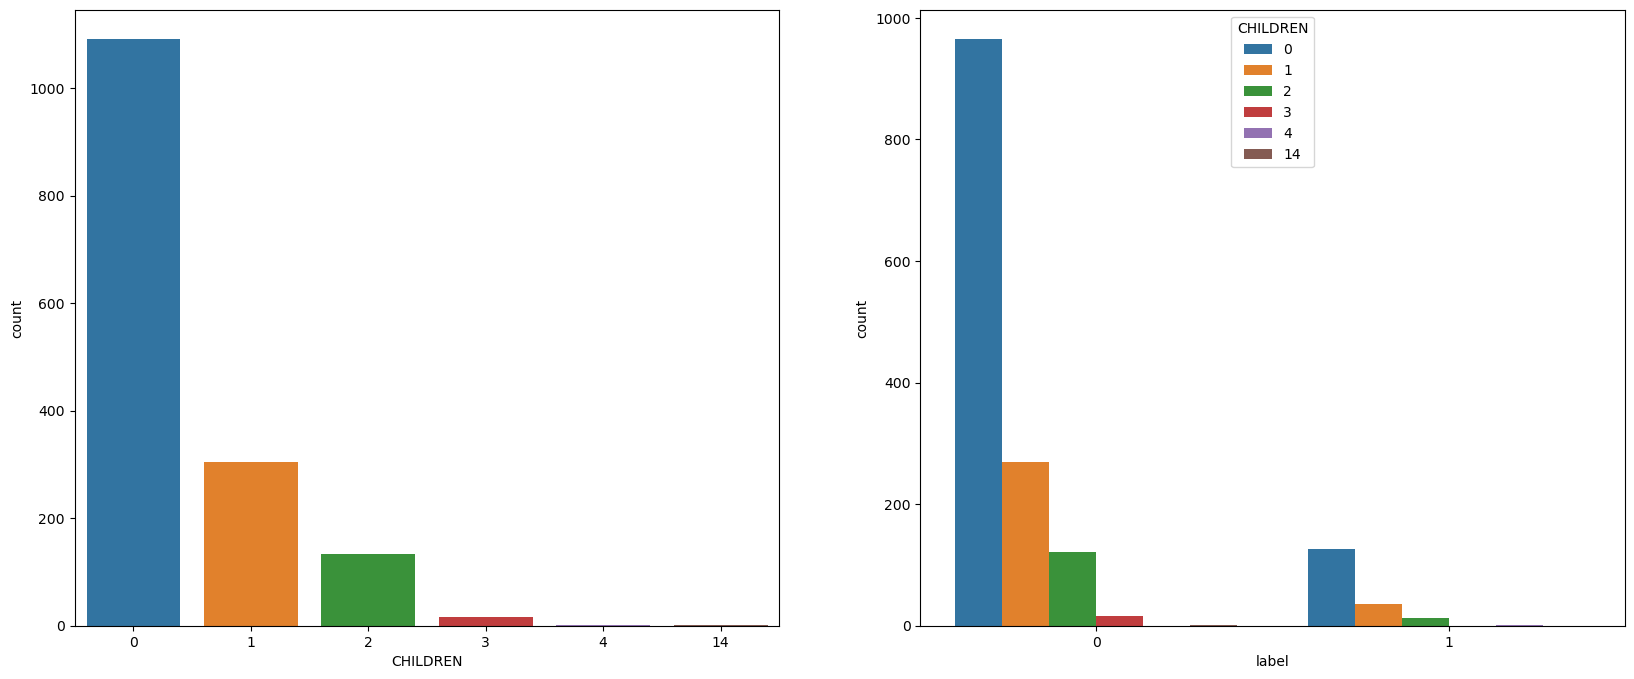

In [41]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(data=data,x='CHILDREN')
plt.subplot(1,2,2)
sns.countplot(data=data,x='label',hue='CHILDREN')

plt.show()

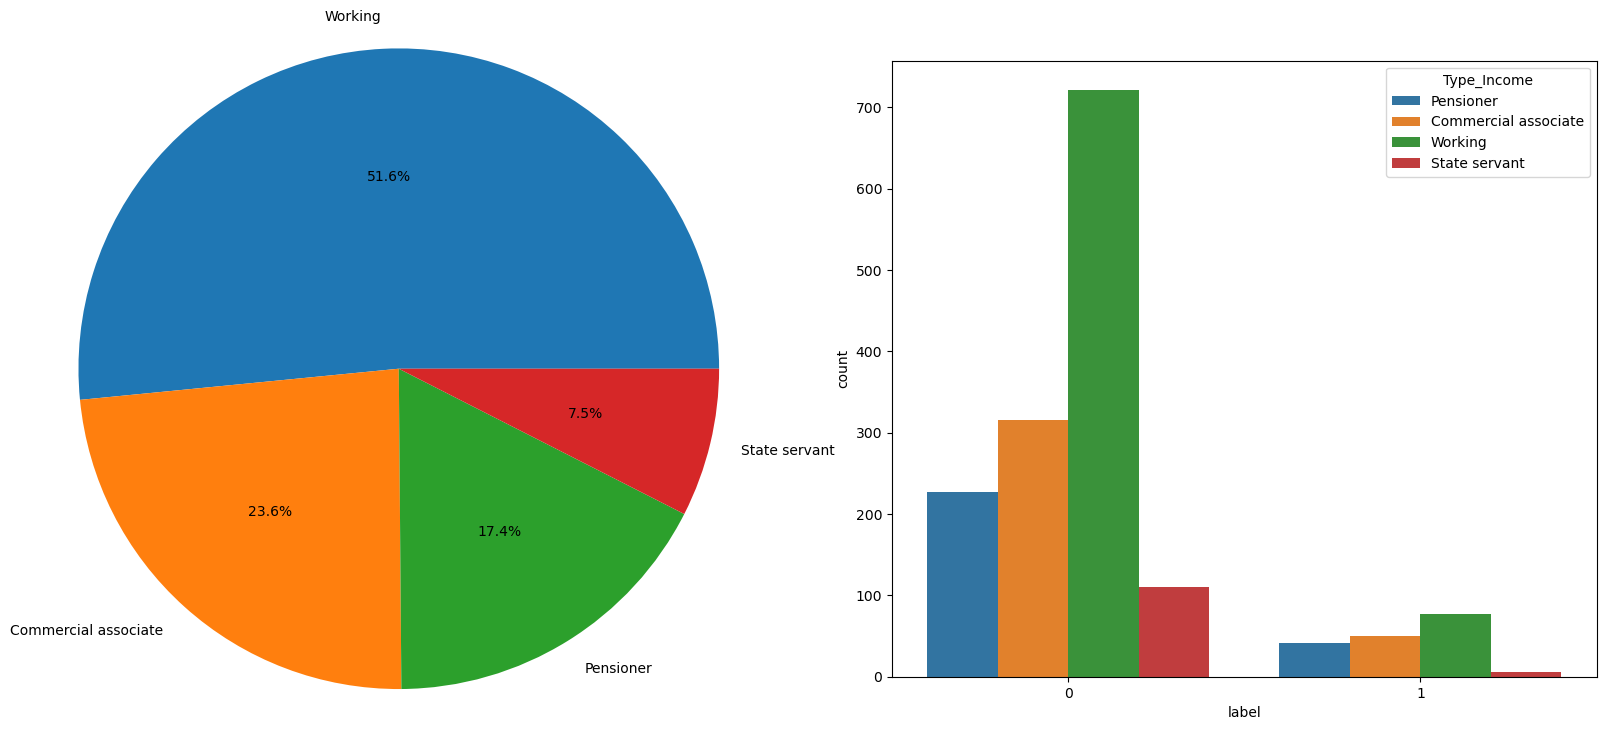

In [42]:
# visualize the Type_Income feature and relation with label data

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.pie(data['Type_Income'].value_counts(),labels=data['Type_Income'].value_counts().index,autopct='%1.1f%%',radius=1.3);
plt.subplot(1,2,2)
sns.countplot(data=data,x='label',hue='Type_Income')

plt.show()

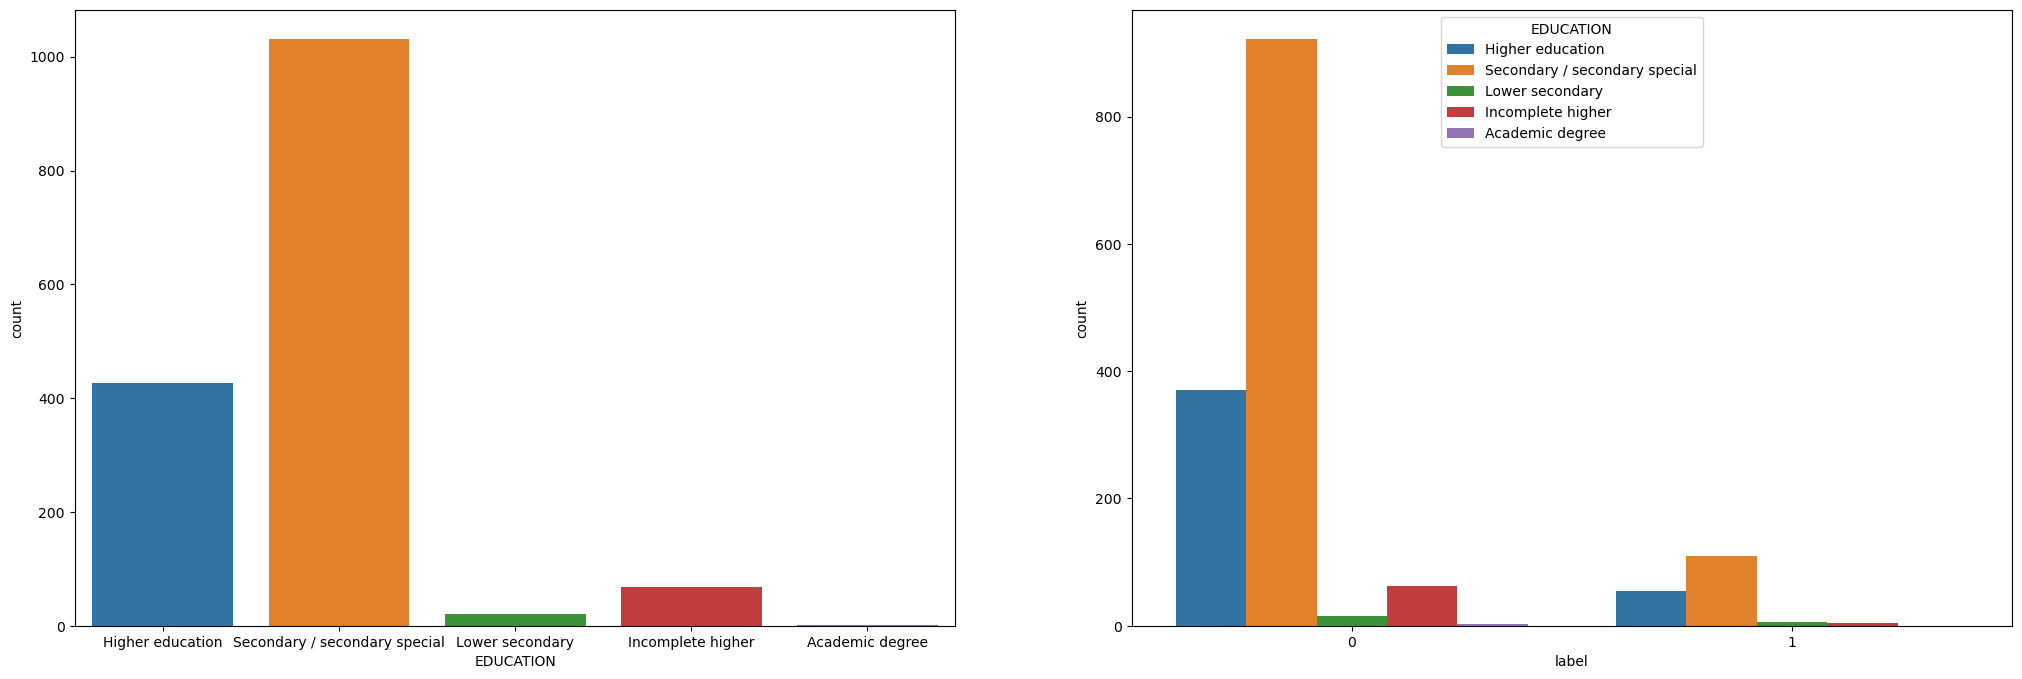

In [43]:
# visualize the EDUCATION feature and relation with label data

plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
sns.countplot(data=data,x='EDUCATION')

plt.subplot(1,2,2)
sns.countplot(data=data,x='label',hue='EDUCATION')

plt.show()

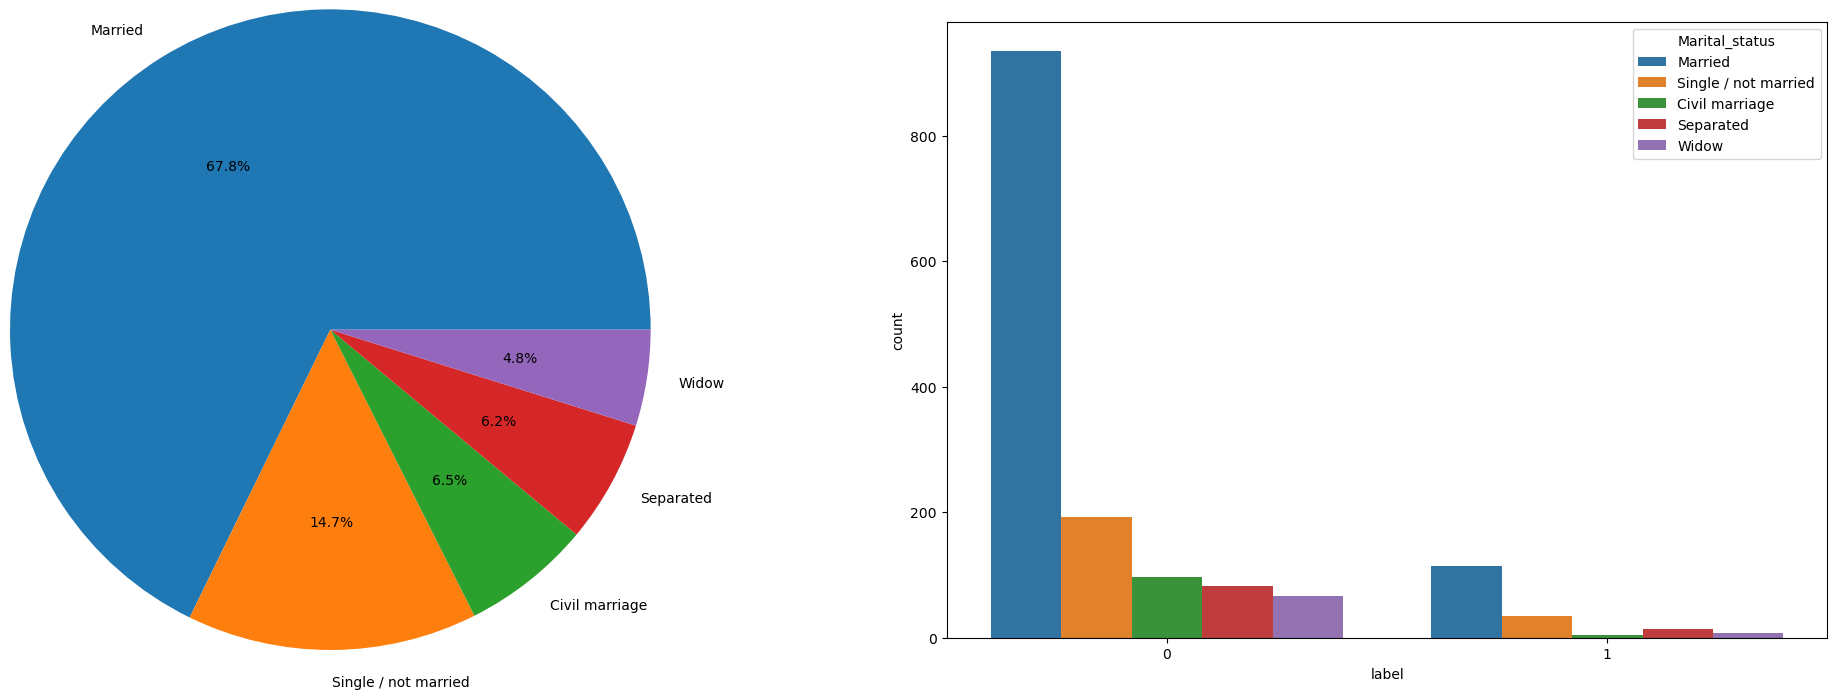

In [44]:
# visualize the Marital_status feature and relation with label data

plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
#sns.countplot(data=data,x='Marital_status')
plt.pie(data['Marital_status'].value_counts(),labels=data['Marital_status'].value_counts().index,autopct='%1.1f%%',radius=1.3);

plt.subplot(1,2,2)
sns.countplot(data=data,x='label',hue='Marital_status')

plt.show()

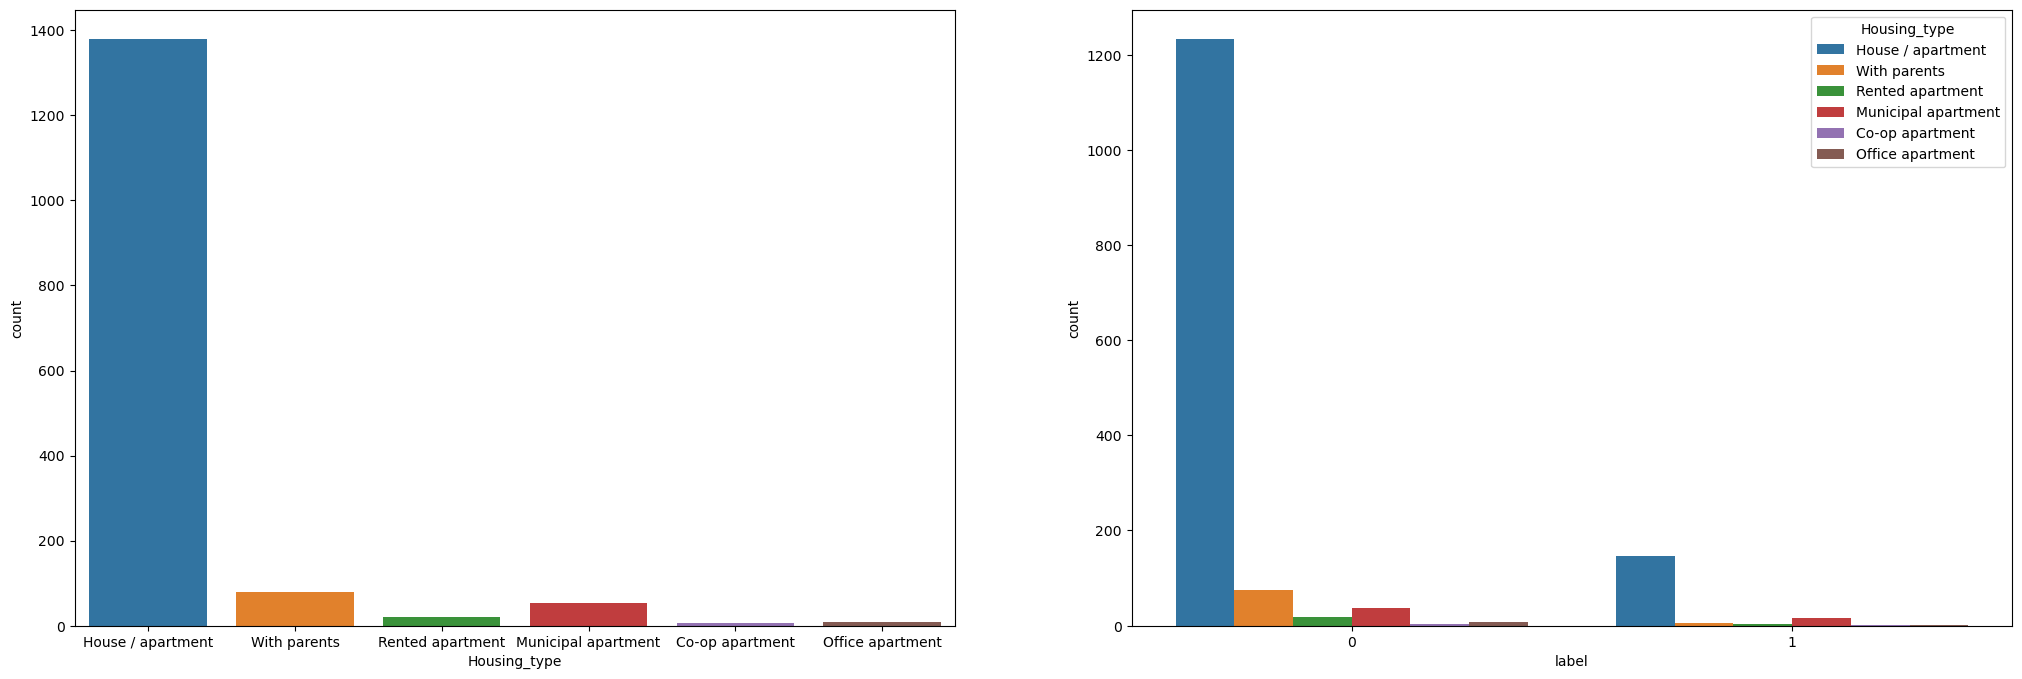

In [45]:
# visualize the Housing_type feature and relation with label data

plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
#sns.countplot(data=data,x='Marital_status')
sns.countplot(data=data,x='Housing_type')

plt.subplot(1,2,2)
sns.countplot(data=data,x='label',hue='Housing_type')

plt.show()

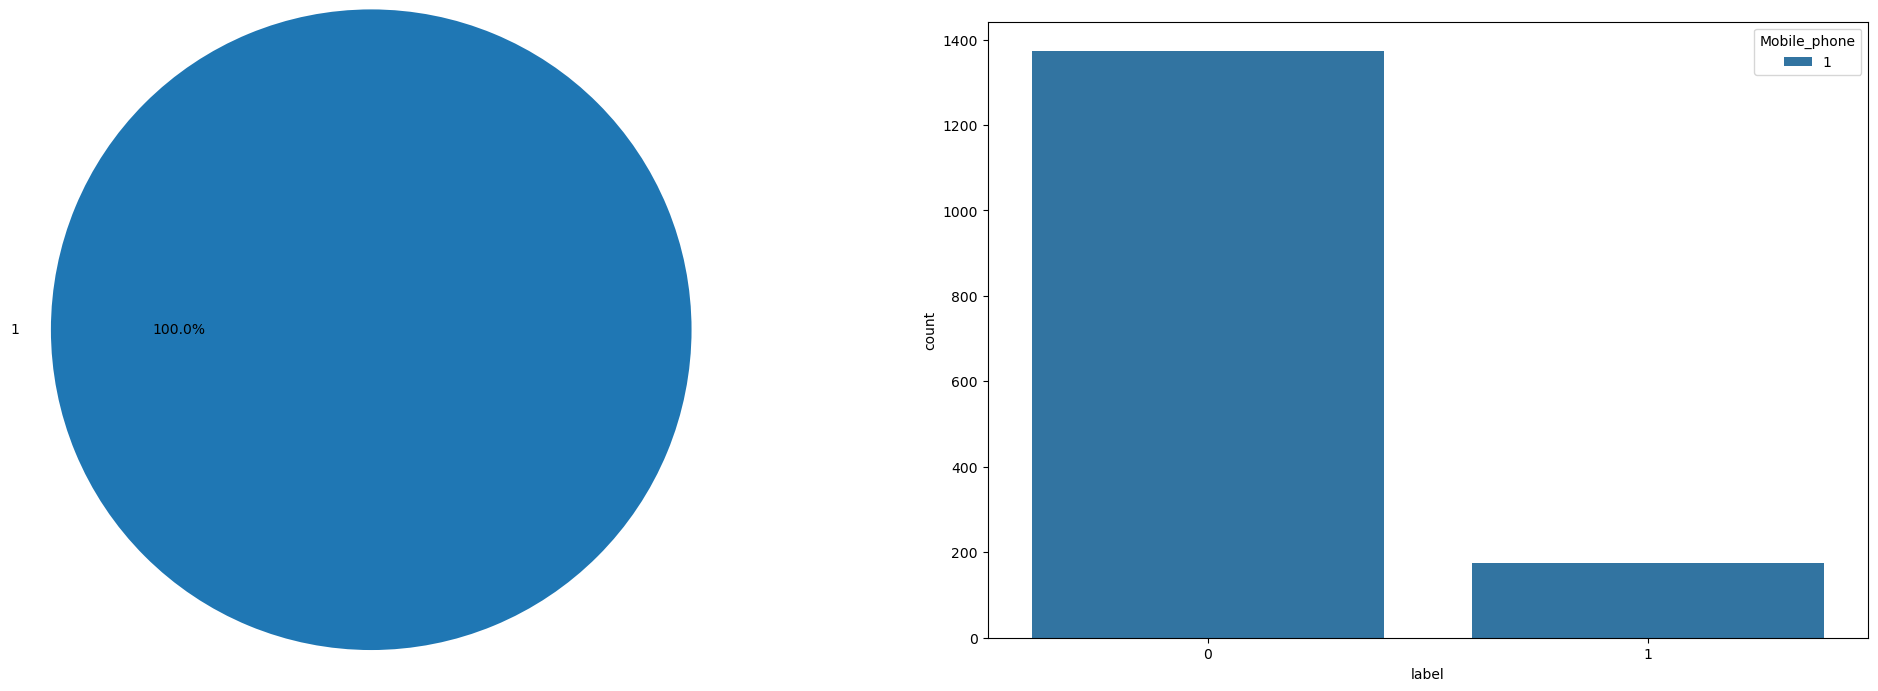

In [46]:
# visualize the Mobile_phone feature and relation with label data

plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
#sns.countplot(data=data,x='Marital_status')
plt.pie(data['Mobile_phone'].value_counts(),labels=data['Mobile_phone'].value_counts().index,autopct='%1.1f%%',radius=1.3);

plt.subplot(1,2,2)
sns.countplot(data=data,x='label',hue='Mobile_phone')

plt.show()

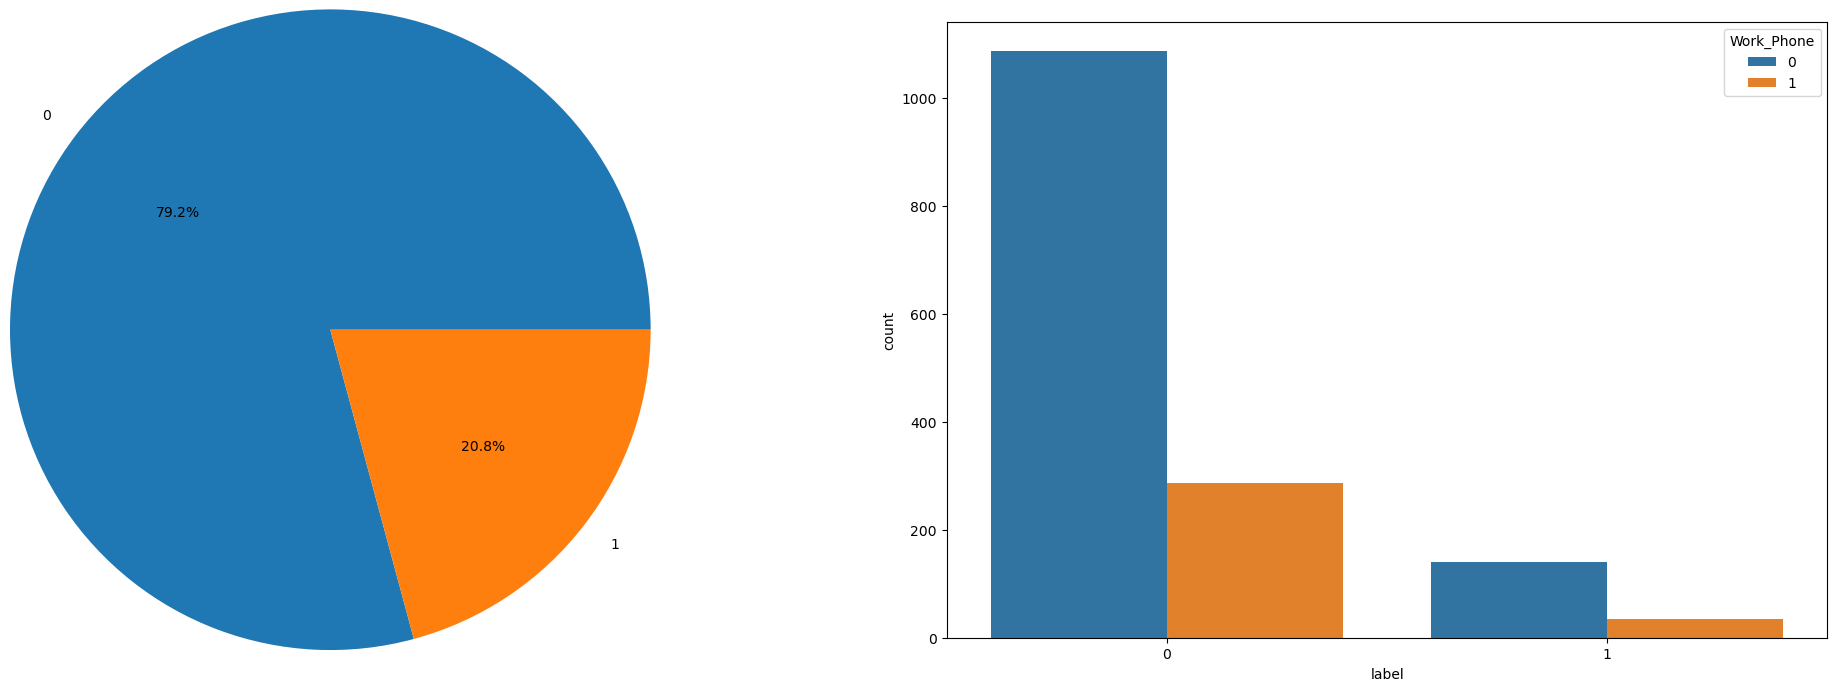

In [47]:
# visualize the Work_Phone feature and relation with label data

plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
#sns.countplot(data=data,x='Marital_status')
plt.pie(data['Work_Phone'].value_counts(),labels=data['Work_Phone'].value_counts().index,autopct='%1.1f%%',radius=1.3);

plt.subplot(1,2,2)
sns.countplot(data=data,x='label',hue='Work_Phone')

plt.show()

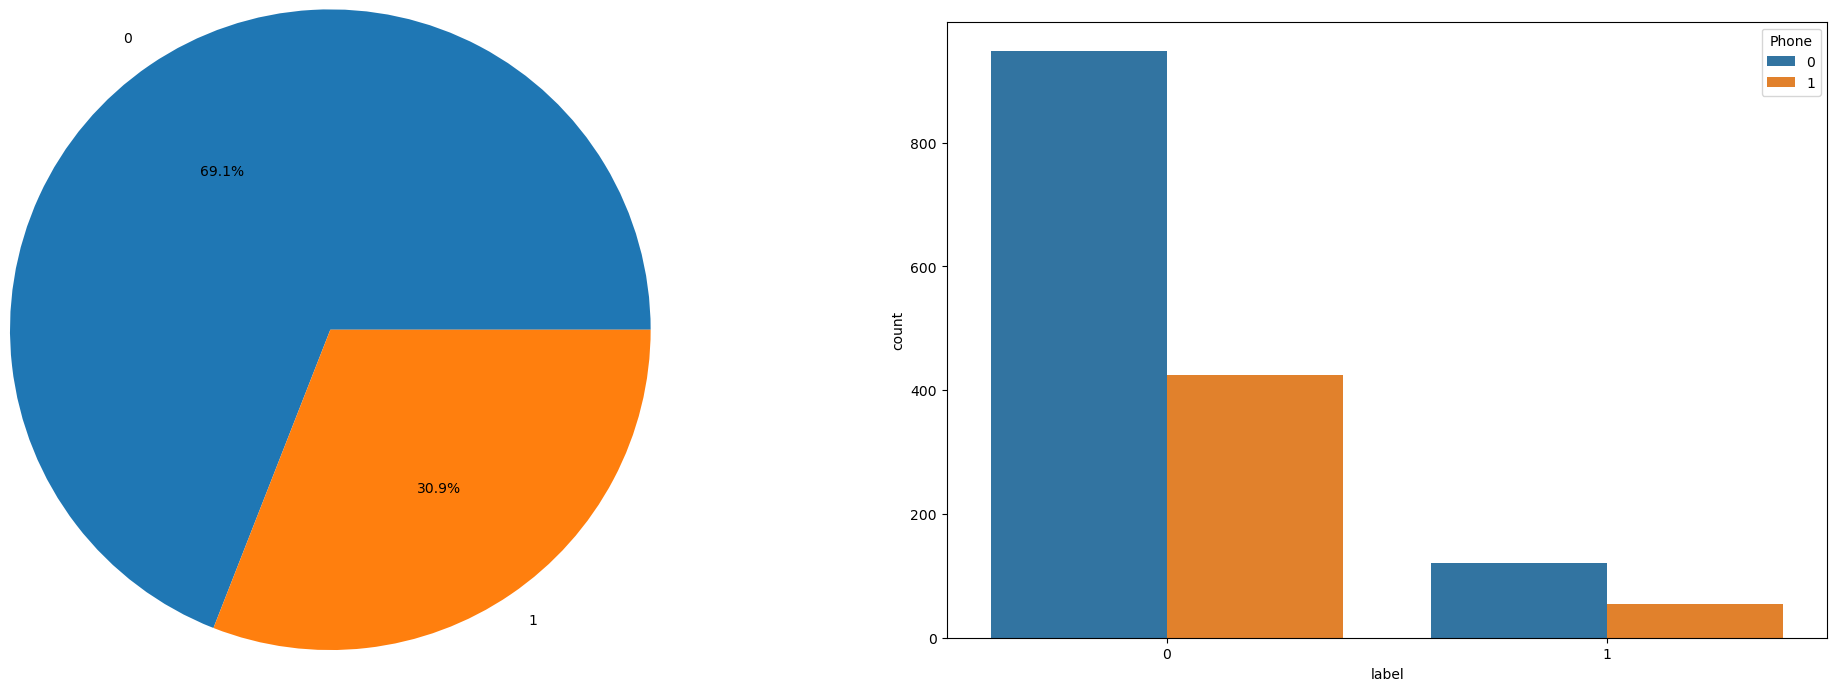

In [48]:
# visualize the Phone feature and relation with label data

plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
#sns.countplot(data=data,x='Marital_status')
plt.pie(data['Phone'].value_counts(),labels=data['Phone'].value_counts().index,autopct='%1.1f%%',radius=1.3);

plt.subplot(1,2,2)
sns.countplot(data=data,x='label',hue='Phone')

plt.show()

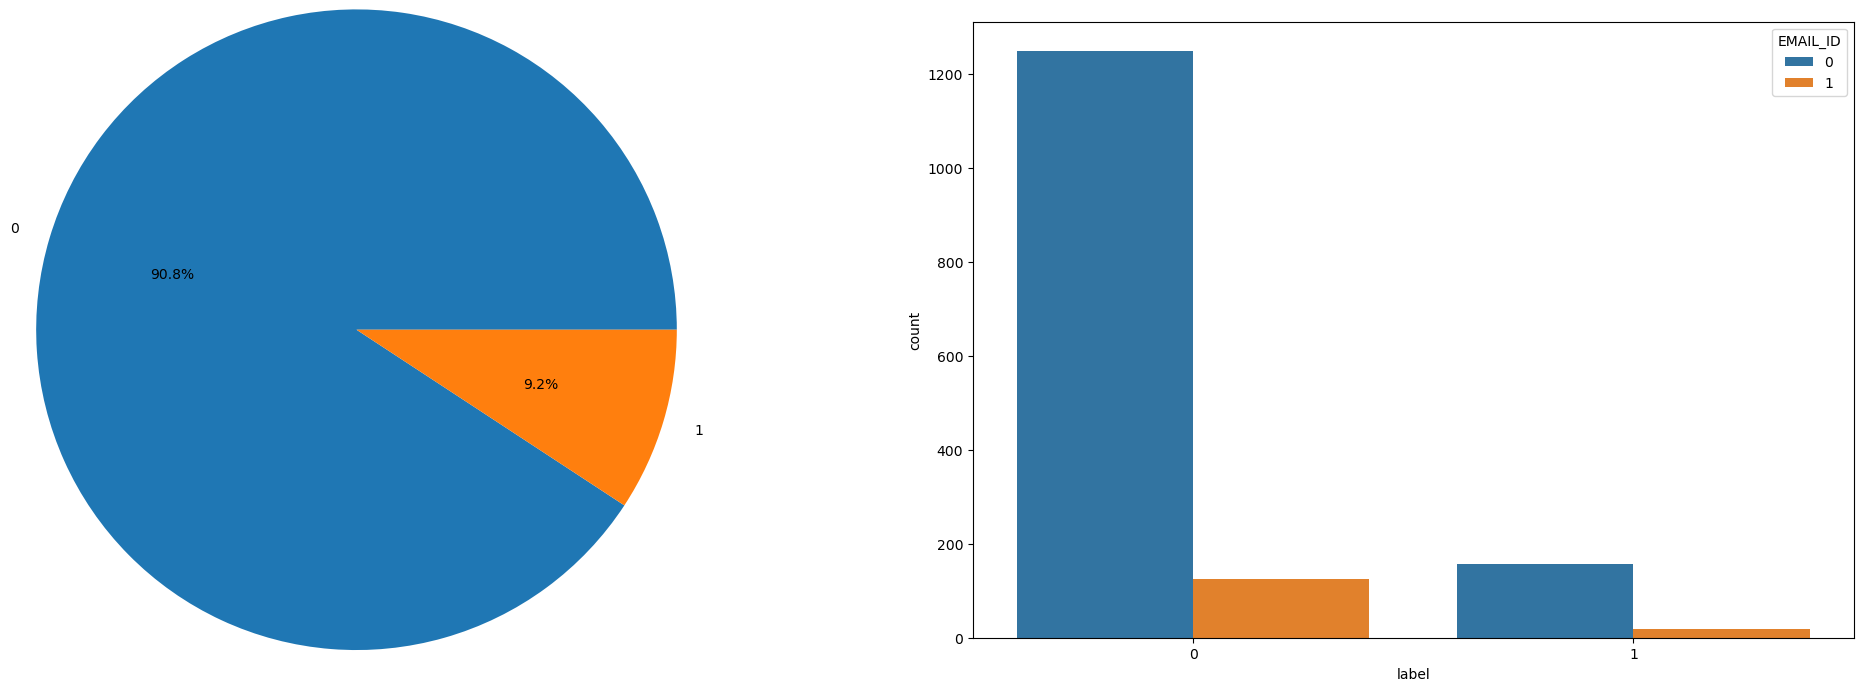

In [49]:
# visualize the EMAIL_ID feature and relation with label data

plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
#sns.countplot(data=data,x='Marital_status')
plt.pie(data['EMAIL_ID'].value_counts(),labels=data['EMAIL_ID'].value_counts().index,autopct='%1.1f%%',radius=1.3);

plt.subplot(1,2,2)
sns.countplot(data=data,x='label',hue='EMAIL_ID')

plt.show()

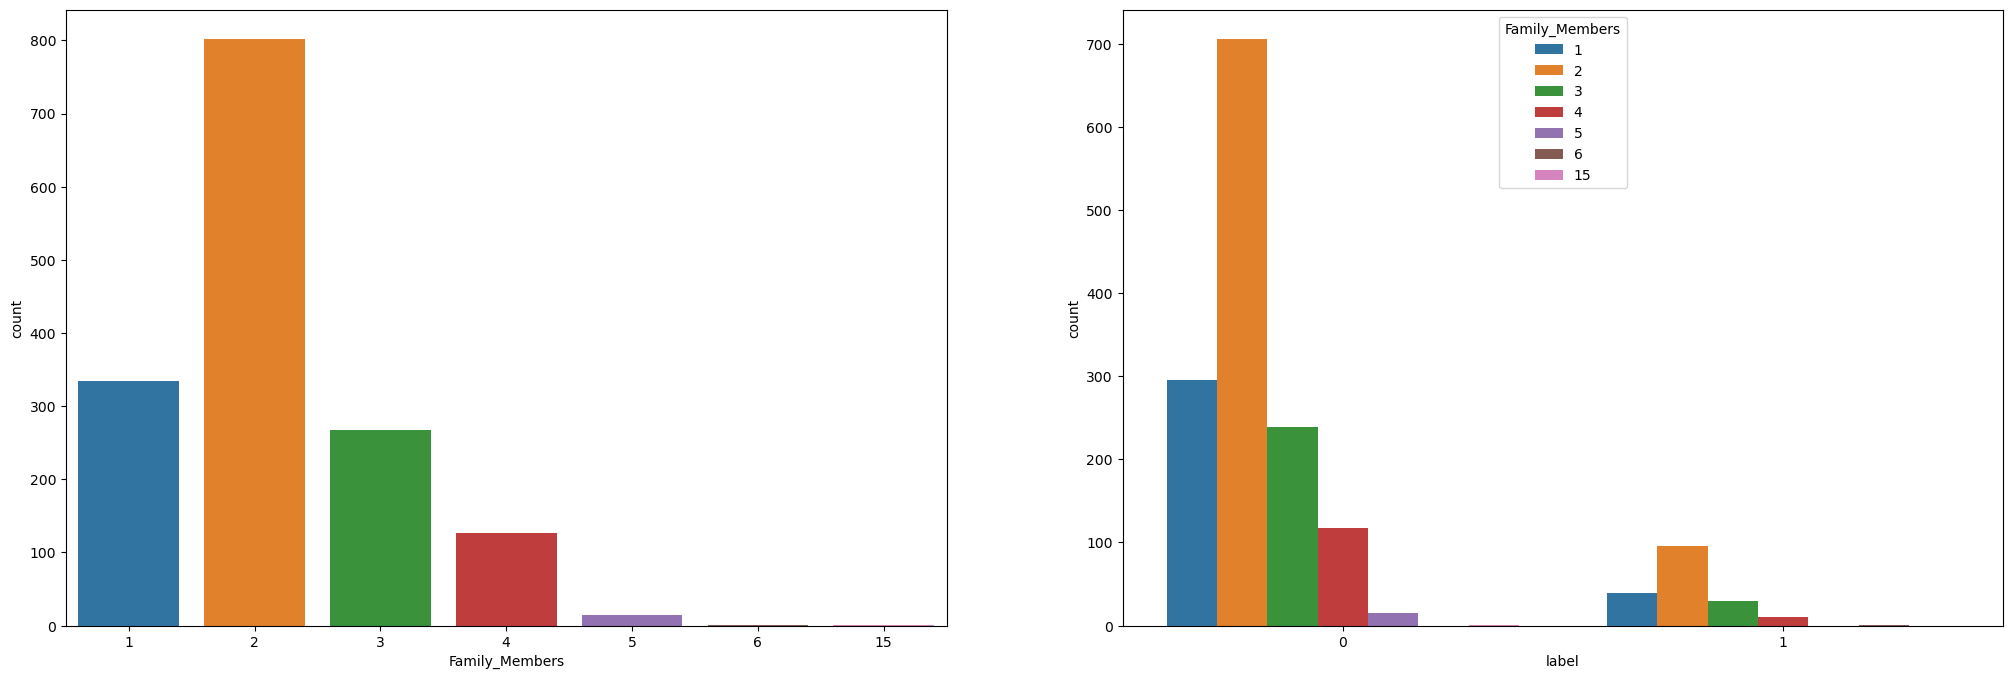

In [50]:
# visualize the Family_Members feature and relation with label data

plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
#sns.countplot(data=data,x='Marital_status')
sns.countplot(data=data,x='Family_Members')

plt.subplot(1,2,2)
sns.countplot(data=data,x='label',hue='Family_Members')

plt.show()

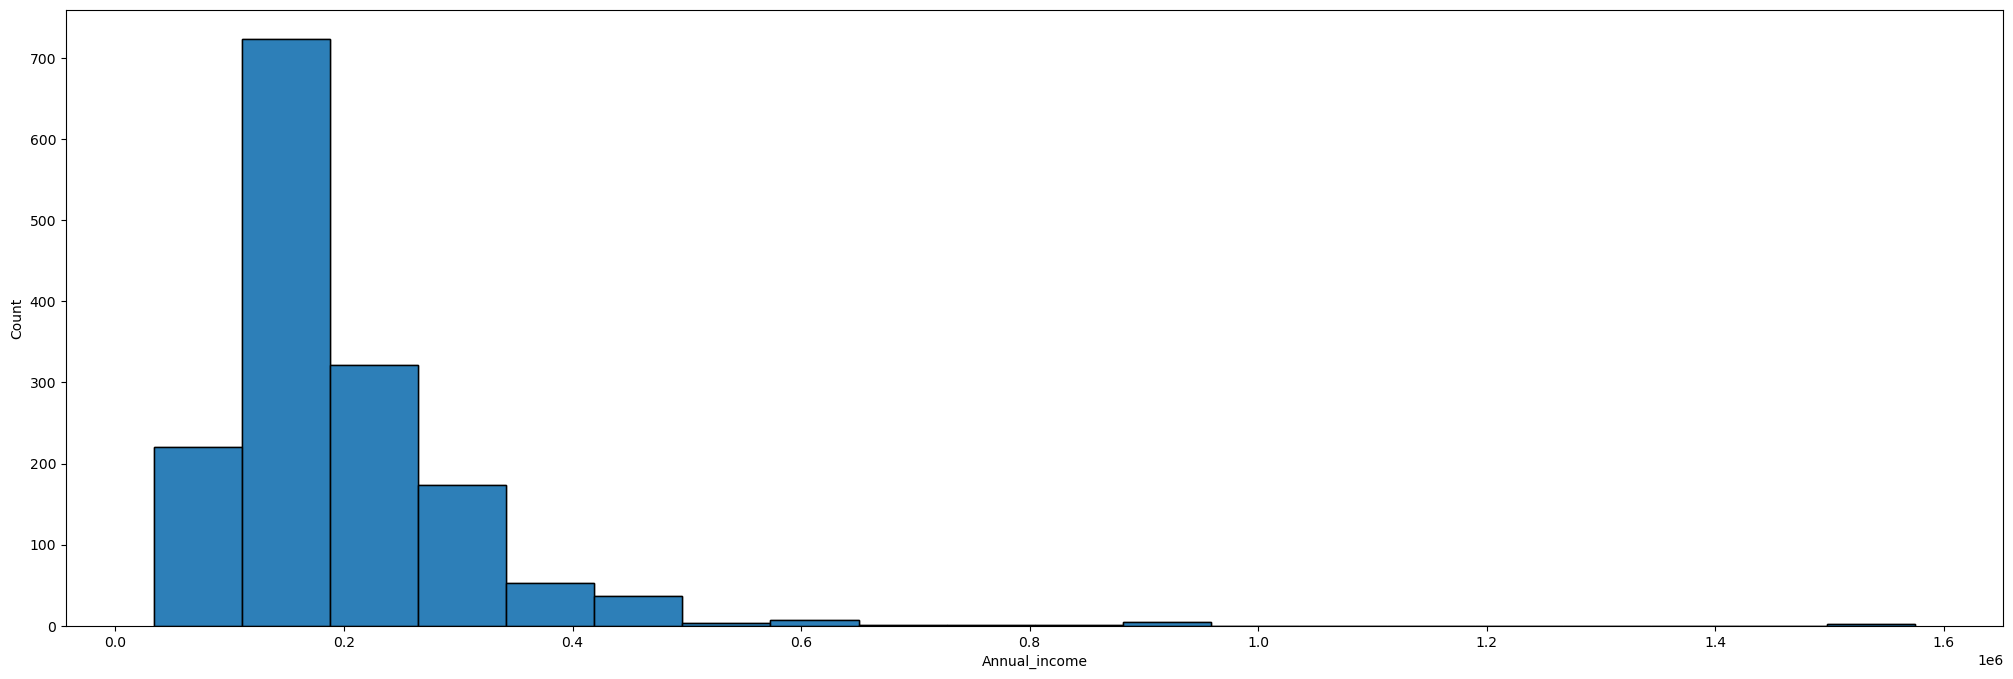

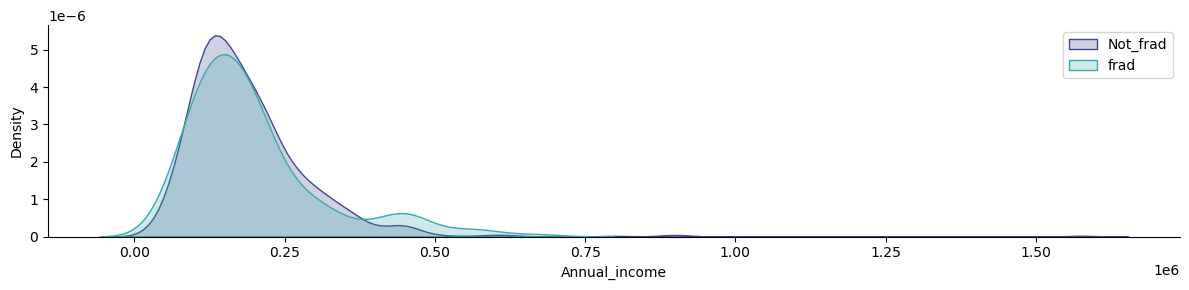

In [51]:
# visualize the Annual_income feature and relation with label data

plt.figure(figsize=(25,8))

#sns.countplot(data=data,x='Marital_status')
sns.histplot(data=data,x='Annual_income',bins=20)

sns.histplot(data=data,x='Annual_income',bins=20)

fig=sns.FacetGrid(data,hue='label',aspect=4,palette='mako')
fig.map(sns.kdeplot,'Annual_income',shade=True)

plt.legend(['Not_frad','frad'])

plt.show()

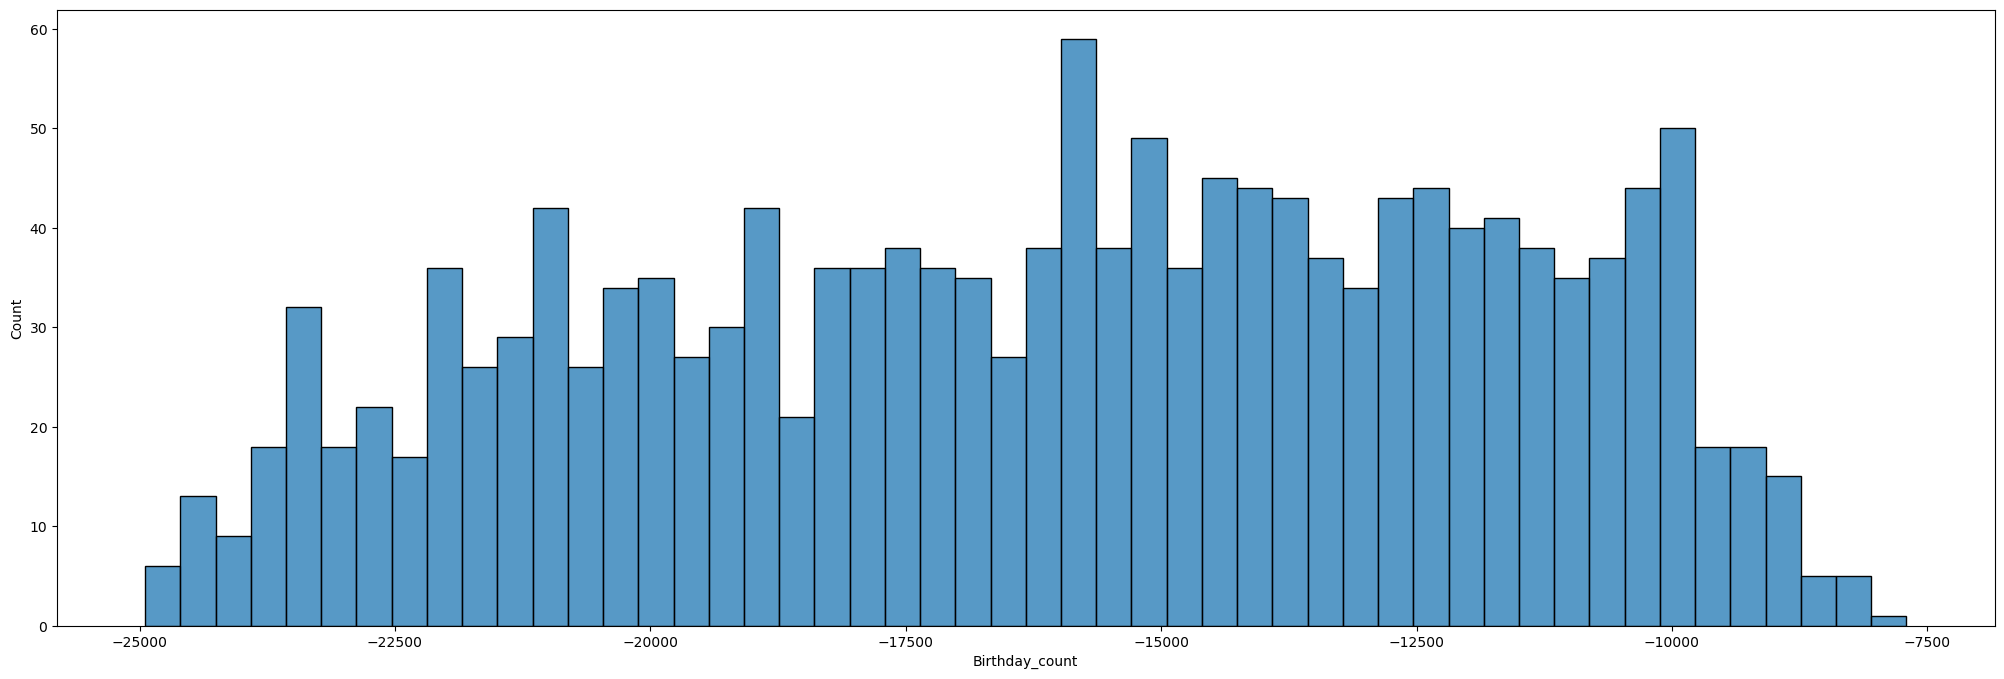

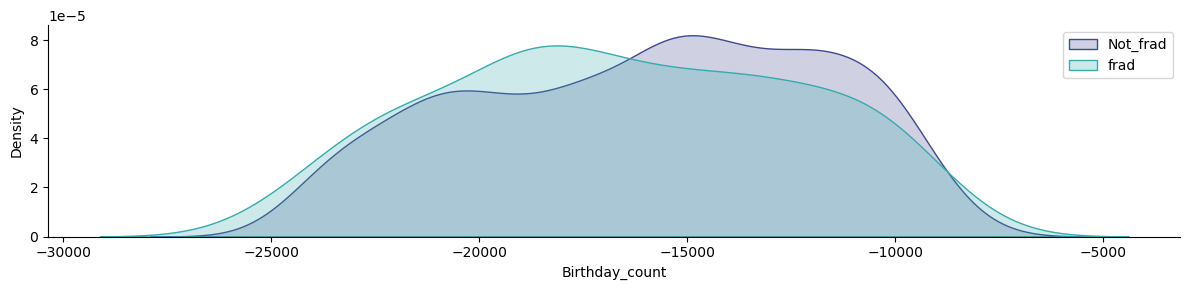

In [52]:
# visualize the Birthday_count feature and relation with label data

plt.figure(figsize=(25,8))

#sns.countplot(data=data,x='Marital_status')
sns.histplot(data=data,x='Birthday_count',bins=50)



fig=sns.FacetGrid(data,hue='label',aspect=4,palette='mako')
fig.map(sns.kdeplot,'Birthday_count',shade=True)

plt.legend(['Not_frad','frad'])

plt.show()

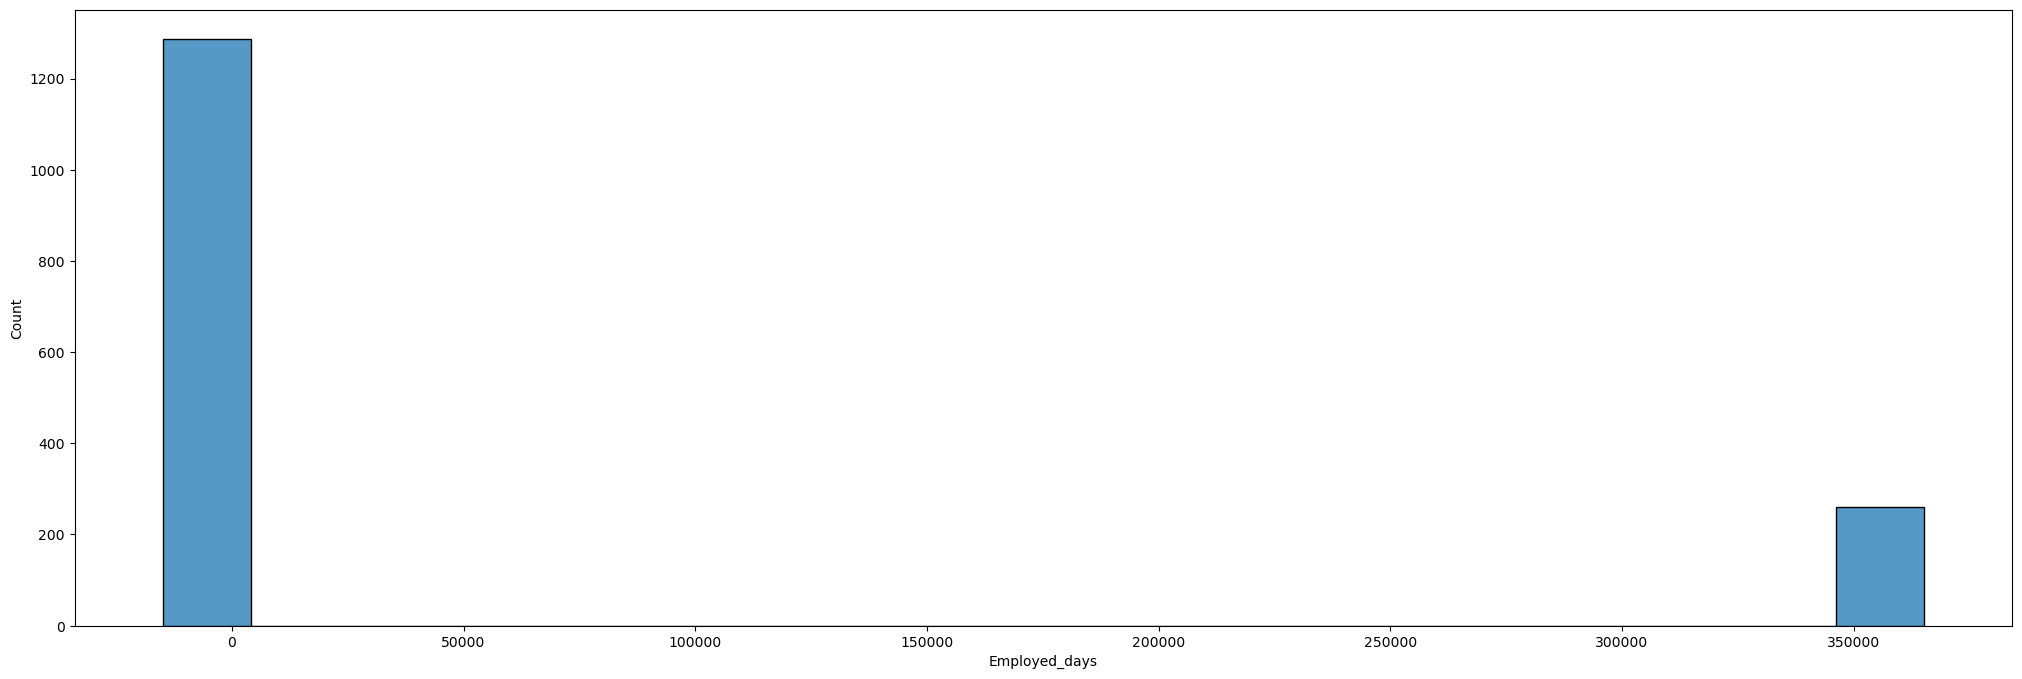

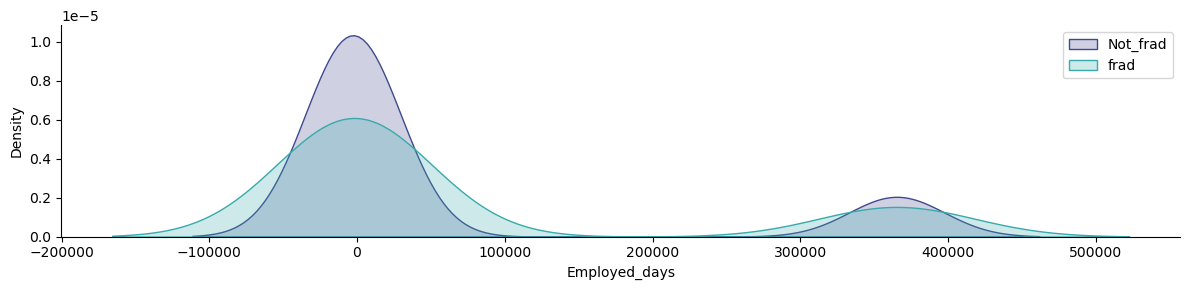

In [53]:
# visualize the Employed_days feature and relation with label data

plt.figure(figsize=(25,8))

#sns.countplot(data=data,x='Marital_status')
sns.histplot(data=data,x='Employed_days',bins=20)



fig=sns.FacetGrid(data,hue='label',aspect=4,palette='mako')
fig.map(sns.kdeplot,'Employed_days',shade=True)

plt.legend(['Not_frad','frad'])

plt.show()

In [54]:
numerical_features=data.select_dtypes(exclude='object')
catgorical_features=data.select_dtypes(include='object')
discrete_feature=[fea for fea in numerical_features if len(data[fea].unique())<25]
countinue_feature=[fea for fea in numerical_features if fea not in discrete_feature]


In [55]:
# create function to remove the exstream outliers 

def outlier_trim(data,var,dis):
    iqr=data[var].quantile(0.75)-data[var].quantile(0.25)
    lower=data[var].quantile(0.25)-(iqr*dis)
    upper=data[var].quantile(0.75)+(iqr*dis)
    return lower,upper

In [56]:
#We need to remove these outliers to make sure they do not affect our model results.
#We will now remove these outliers.

for i in countinue_feature:
    lower,upper=outlier_trim(data,i,3)
    data[i]=np.where(data[i] > upper,upper,np.where(data[i] < lower,lower,data[i]))

    

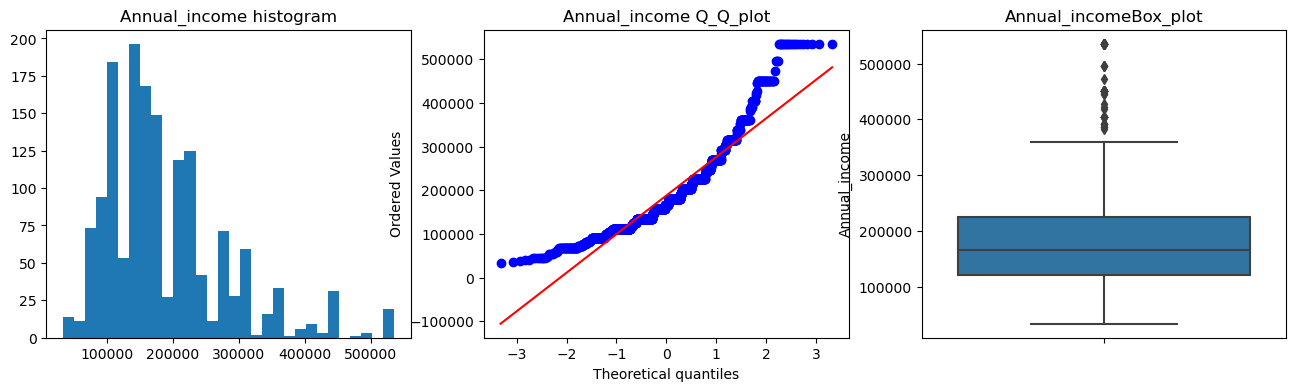

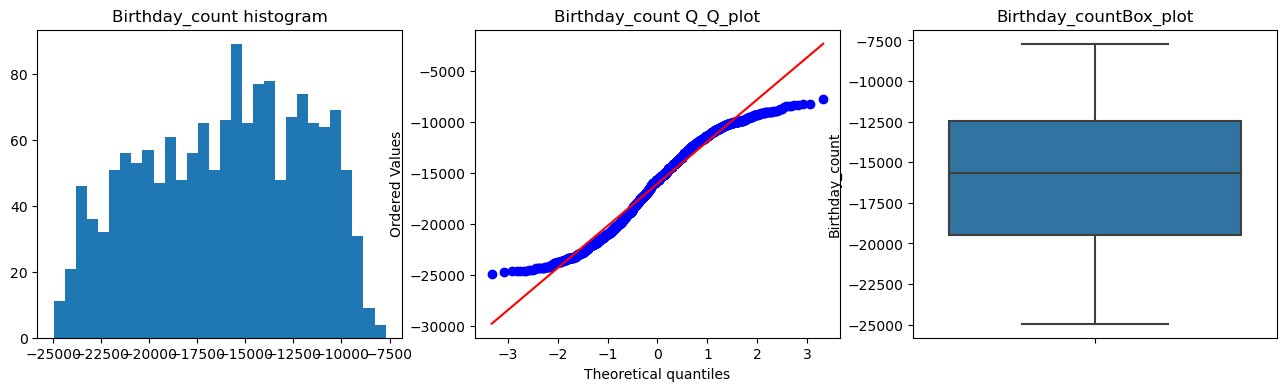

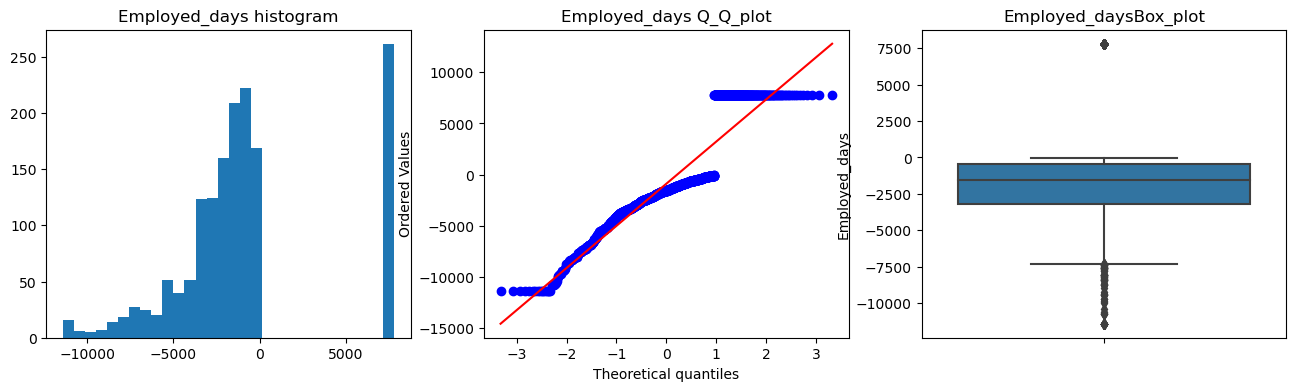

In [57]:
#check outliers
check(data,countinue_feature)

In [ ]:
# Encodeing the catgorical features

In [58]:
data['GENDER']=data['GENDER'].map({'M':1,'F':0})
data['Car_Owner']=data['Car_Owner'].map({'Y':1,'N':0})
data['Propert_Owner']=data['Propert_Owner'].map({'Y':1,'N':0})
data['EDUCATION']=data['EDUCATION'].map({'Lower secondary':0,'Secondary / secondary special':1,'Incomplete higher':2,'Higher education':3,'Academic degree':4})

In [60]:
# we have transformed all the non numeric data columns into data columns
# this method applies 0,1.. classification to different value types.

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for i in catgorical_features:
    data[i]=lb.fit_transform(data[i])
data.head() 

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,1,1,1,0,180000.0,1,3,1,1,-18772.0,7796.5,1,0,0,0,2,1
1,0,1,0,0,315000.0,0,3,1,1,-13557.0,-586.0,1,1,1,0,2,1
2,0,1,0,0,315000.0,0,3,1,1,-15661.5,-586.0,1,1,1,0,2,1
3,0,1,0,0,166500.0,0,3,1,1,-13557.0,-586.0,1,1,1,0,2,1
4,0,1,0,0,315000.0,0,3,1,1,-13557.0,-586.0,1,1,1,0,2,1


# Data Modling

In [61]:
x=data.iloc[:,:-1] # X value contains all the variables except labels
y=data.iloc[:,-1] # these are the labels

# we create the test train split first

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44)

# we have now fit and transform the data into a scaler for accurate reading and results.

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



### why Random forest

Random forests are a popular machine learning algorithm for several reasons:

Random forests can handle a mix of categorical and continuous data.

They are relatively easy to use and require minimal data preprocessing.

Random forests are less prone to overfitting than other models like decision trees or neural networks.
They are versatile and can be used for classification or regression tasks.

Random forests can provide insights into feature importance, which can be helpful for understanding the data.

In [62]:
# initialize the model
rad_model=RandomForestClassifier(n_estimators=200,random_state=44)

# fit the data
rad_model.fit(x_train,y_train)

# predict the outcome

y_preds=rad_model.predict(x_test)

# Cross-validation provides a more reliable estimate of a model's performance 
# by using multiple subsets of the data for both training and testing.

score = cross_val_score(rad_model, x_train, y_train, cv=5, scoring='recall')

print("Cross Validation Recall scores are: {}".format(score))

print("Average Cross Validation Recall score: {}".format(score.mean()))

print('Score : ',rad_model.score(x_test,y_test))

#confusion_matrix helps to identify the specific types of errors made by a model, 
#which can be useful for improving the model or understanding the underlying data.

print(confusion_matrix(y_test,y_preds))

# classification_report helps to evaluate the performance of a model
print(classification_report(y_test,y_preds))


Cross Validation Recall scores are: [0.42857143 0.39285714 0.32142857 0.32142857 0.35714286]
Average Cross Validation Recall score: 0.36428571428571427
Score :  0.9290322580645162
[[272   3]
 [ 19  16]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       275
           1       0.84      0.46      0.59        35

    accuracy                           0.93       310
   macro avg       0.89      0.72      0.78       310
weighted avg       0.92      0.93      0.92       310



# Balance the data by over_sampling

By artificially increasing the number of samples in the minority class through techniques such as random oversampling or synthetic oversampling (e.g., SMOTE), oversampling can help to mitigate the effects of class imbalance and improve the overall performance of a machine learning model.

> 3 diffrent technics to over_sample the data and compare with then

 > 1. SMOTE
 
 > 2. SMOTETomek
 
 > 3.RandomOverSampler

In [63]:
from imblearn.over_sampling import SMOTE

kf = StratifiedKFold(n_splits=5, shuffle=False)

rm=SMOTE(random_state=44)

x_or,y_or=rm.fit_resample(x,y)

x_train,x_test,y_train,y_test=train_test_split(x_or,y_or,test_size=0.2,random_state=44)

rad_model=RandomForestClassifier(n_estimators=200,random_state=44)

rad_model.fit(x_train,y_train)

y_preds=rad_model.predict(x_test)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(rad_model, x_test, y_test, cv=kf, scoring='recall')

print("Cross Validation Recall scores are: {}".format(score))

print("Average Cross Validation Recall score: {}".format(score.mean()))


print(rad_model.score(x_test,y_test))
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))

Cross Validation Recall scores are: [0.94642857 0.89285714 0.91071429 0.83928571 0.85964912]
Average Cross Validation Recall score: 0.8897869674185465
0.9454545454545454
[[254  15]
 [ 15 266]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       269
           1       0.95      0.95      0.95       281

    accuracy                           0.95       550
   macro avg       0.95      0.95      0.95       550
weighted avg       0.95      0.95      0.95       550



In [64]:
from imblearn.combine import SMOTETomek

kf = StratifiedKFold(n_splits=5, shuffle=False)

rm=SMOTETomek(random_state=44)

x_or,y_or=rm.fit_resample(x,y)

x_train,x_test,y_train,y_test=train_test_split(x_or,y_or,test_size=0.2,random_state=44)

rad_model=RandomForestClassifier(n_estimators=200,random_state=44)

rad_model.fit(x_train,y_train)

y_preds=rad_model.predict(x_test)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(rad_model, x_test, y_test, cv=kf, scoring='recall')

print("Cross Validation Recall scores are: {}".format(score))

print("Average Cross Validation Recall score: {}".format(score.mean()))


print(rad_model.score(x_test,y_test))
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))

Cross Validation Recall scores are: [0.9  0.92 0.84 0.9  0.88]
Average Cross Validation Recall score: 0.8880000000000001
0.9426877470355731
[[237  19]
 [ 10 240]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       256
           1       0.93      0.96      0.94       250

    accuracy                           0.94       506
   macro avg       0.94      0.94      0.94       506
weighted avg       0.94      0.94      0.94       506



In [65]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=False)

rm=RandomOverSampler(random_state=44)

x_or,y_or=rm.fit_resample(x,y)

x_train,x_test,y_train,y_test=train_test_split(x_or,y_or,test_size=0.2,random_state=44)

rad_model=RandomForestClassifier(n_estimators=200,random_state=44)

rad_model.fit(x_train,y_train)

y_preds=rad_model.predict(x_test)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
kf = StratifiedKFold(n_splits=5, shuffle=False)
score = cross_val_score(rad_model, x_test, y_test, cv=kf, scoring='recall')

print("Cross Validation Recall scores are: {}".format(score))

print("Average Cross Validation Recall score: {}".format(score.mean()))


print(rad_model.score(x_test,y_test))
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))

Cross Validation Recall scores are: [0.875      0.98214286 0.80357143 0.89285714 0.77192982]
Average Cross Validation Recall score: 0.8651002506265664
0.9872727272727273
[[262   7]
 [  0 281]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       269
           1       0.98      1.00      0.99       281

    accuracy                           0.99       550
   macro avg       0.99      0.99      0.99       550
weighted avg       0.99      0.99      0.99       550



 compare to 3 sampleing techinics RandomOverSampler is perform well
 
We notice in the value counts above that label types are now balanced

the problem of oversampling is solved now

we will now implement different models to see which one performs the best

In [66]:
# again the sampling and predic the outcome by using ml_models and compare accuracy 
from imblearn.over_sampling import RandomOverSampler

kf = StratifiedKFold(n_splits=5, shuffle=False)

rm=RandomOverSampler(random_state=44)

x_or,y_or=rm.fit_resample(x,y)

x_train,x_test,y_train,y_test=train_test_split(x_or,y_or,test_size=0.2,random_state=44)

In [67]:
#LogisticRegression

log_model=LogisticRegression()

log_model.fit(x_train,y_train)

l_preds=log_model.predict(x_test)

score = cross_val_score(log_model, x_test, y_test, cv=kf, scoring='recall')

print("Cross Validation Recall scores are: {}".format(score))

print("Average Cross Validation Recall score: {}".format(score.mean()))

lr_acc_score = accuracy_score(y_test, l_preds)

print("Accuracy :",lr_acc_score*100,'\n')

print(log_model.score(x_test,y_test))
print(confusion_matrix(y_test,l_preds))
print(classification_report(y_test,l_preds))

Cross Validation Recall scores are: [0.73214286 0.53571429 0.57142857 0.625      0.68421053]
Average Cross Validation Recall score: 0.6296992481203008
Accuracy : 52.90909090909091 

0.5290909090909091
[[165 104]
 [155 126]]
              precision    recall  f1-score   support

           0       0.52      0.61      0.56       269
           1       0.55      0.45      0.49       281

    accuracy                           0.53       550
   macro avg       0.53      0.53      0.53       550
weighted avg       0.53      0.53      0.53       550



In [72]:
#RandomForestClassifier
rad_model=RandomForestClassifier(n_estimators=200,random_state=44)

rad_model.fit(x_train,y_train)

r_preds=rad_model.predict(x_test)

score = cross_val_score(rad_model, x_test, y_test, cv=kf, scoring='recall')

print("Cross Validation Recall scores are: {}".format(score))

print("Average Cross Validation Recall score: {}".format(score.mean()))

lr_acc_score = accuracy_score(y_test, r_preds)

print("Accuracy :",lr_acc_score*100,'\n')

print(rad_model.score(x_test,y_test))
print(confusion_matrix(y_test,r_preds))
print(classification_report(y_test,r_preds))

Cross Validation Recall scores are: [0.875      0.98214286 0.80357143 0.89285714 0.77192982]
Average Cross Validation Recall score: 0.8651002506265664
Accuracy : 98.72727272727273 

0.9872727272727273
[[262   7]
 [  0 281]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       269
           1       0.98      1.00      0.99       281

    accuracy                           0.99       550
   macro avg       0.99      0.99      0.99       550
weighted avg       0.99      0.99      0.99       550



In [73]:
#KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

k_preds=knn.predict(x_test)

score = cross_val_score(knn, x_test, y_test, cv=kf, scoring='recall')

print("Cross Validation Recall scores are: {}".format(score))

print("Average Cross Validation Recall score: {}".format(score.mean()))

k_acc_score = accuracy_score(y_test, k_preds)

print("Accuracy :",lr_acc_score*100,'\n')

print(knn.score(x_test,y_test))
print(confusion_matrix(y_test,k_preds))
print(classification_report(y_test,k_preds))

Cross Validation Recall scores are: [0.78571429 0.75       0.80357143 0.76785714 0.75438596]
Average Cross Validation Recall score: 0.7723057644110276
Accuracy : 98.72727272727273 

0.850909090909091
[[187  82]
 [  0 281]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       269
           1       0.77      1.00      0.87       281

    accuracy                           0.85       550
   macro avg       0.89      0.85      0.85       550
weighted avg       0.88      0.85      0.85       550



In [74]:
# xgboost classifier

XGB=XGBClassifier()

XGB.fit(x_train,y_train)

XG_preds=XGB.predict(x_test)

score = cross_val_score(XGB, x_test, y_test, cv=kf, scoring='recall')

print("Cross Validation Recall scores are: {}".format(score))

print("Average Cross Validation Recall score: {}".format(score.mean()))

xgb_acc_score = accuracy_score(y_test, XG_preds)

print("Accuracy :",lr_acc_score*100,'\n')

print(XGB.score(x_test,y_test))
print(confusion_matrix(y_test,XG_preds))
print(classification_report(y_test,XG_preds))

Cross Validation Recall scores are: [0.89285714 0.98214286 0.78571429 0.875      0.84210526]
Average Cross Validation Recall score: 0.8755639097744361
Accuracy : 98.72727272727273 

0.9727272727272728
[[254  15]
 [  0 281]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       269
           1       0.95      1.00      0.97       281

    accuracy                           0.97       550
   macro avg       0.97      0.97      0.97       550
weighted avg       0.97      0.97      0.97       550



In [75]:
#naive bayes

Gaus=GaussianNB()

Gaus.fit(x_train,y_train)

g_preds=Gaus.predict(x_test)

score = cross_val_score(Gaus, x_test, y_test, cv=kf, scoring='recall')

print("Cross Validation Recall scores are: {}".format(score))

print("Average Cross Validation Recall score: {}".format(score.mean()))

g_acc_score = accuracy_score(y_test, g_preds)

print("Accuracy :",lr_acc_score*100,'\n')

print(Gaus.score(x_test,y_test))
print(confusion_matrix(y_test,g_preds))
print(classification_report(y_test,g_preds))

Cross Validation Recall scores are: [0.58928571 0.41071429 0.58928571 0.5        0.52631579]
Average Cross Validation Recall score: 0.5231203007518797
Accuracy : 98.72727272727273 

0.5545454545454546
[[188  81]
 [164 117]]
              precision    recall  f1-score   support

           0       0.53      0.70      0.61       269
           1       0.59      0.42      0.49       281

    accuracy                           0.55       550
   macro avg       0.56      0.56      0.55       550
weighted avg       0.56      0.55      0.55       550



In [76]:
# DecisionTreeClassifier
Tree=DecisionTreeClassifier()

Tree.fit(x_train,y_train)

T_preds=Tree.predict(x_test)

score = cross_val_score(Tree, x_test, y_test, cv=kf, scoring='recall')

print("Cross Validation Recall scores are: {}".format(score))

print("Average Cross Validation Recall score: {}".format(score.mean()))

t_acc_score = accuracy_score(y_test, T_preds)

print("Accuracy :",lr_acc_score*100,'\n')

print(Tree.score(x_test,y_test))
print(confusion_matrix(y_test,T_preds))
print(classification_report(y_test,T_preds))

Cross Validation Recall scores are: [0.89285714 0.98214286 0.78571429 0.92857143 0.8245614 ]
Average Cross Validation Recall score: 0.8827694235588973
Accuracy : 98.72727272727273 

0.9581818181818181
[[246  23]
 [  0 281]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.96       269
           1       0.92      1.00      0.96       281

    accuracy                           0.96       550
   macro avg       0.96      0.96      0.96       550
weighted avg       0.96      0.96      0.96       550



In [77]:
# Support Vector Machine

svc=SVC()

svc.fit(x_train,y_train)

s_preds=svc.predict(x_test)

score = cross_val_score(svc, x_test, y_test, cv=kf, scoring='recall')

print("Cross Validation Recall scores are: {}".format(score))

print("Average Cross Validation Recall score: {}".format(score.mean()))

s_acc_score = accuracy_score(y_test, s_preds)

print("Accuracy :",lr_acc_score*100,'\n')

print(svc.score(x_test,y_test))
print(confusion_matrix(y_test,s_preds))
print(classification_report(y_test,s_preds))

Cross Validation Recall scores are: [0.78571429 1.         1.         1.         0.8245614 ]
Average Cross Validation Recall score: 0.9220551378446116
Accuracy : 98.72727272727273 

0.5127272727272727
[[251  18]
 [250  31]]
              precision    recall  f1-score   support

           0       0.50      0.93      0.65       269
           1       0.63      0.11      0.19       281

    accuracy                           0.51       550
   macro avg       0.57      0.52      0.42       550
weighted avg       0.57      0.51      0.41       550



### The ROC curve 

it enables us to visually evaluate the sensitivity and specificity of a model across a range of possible classification thresholds. This can help us to determine the optimal threshold value for our model and to understand the trade-offs between sensitivity and specificity.

In addition, the area under the ROC curve (AUC) is a commonly used metric to evaluate the performance of a classification model. AUC measures the overall performance of the model across all possible classification thresholds, providing a single number that can be used to compare the performance of different models.

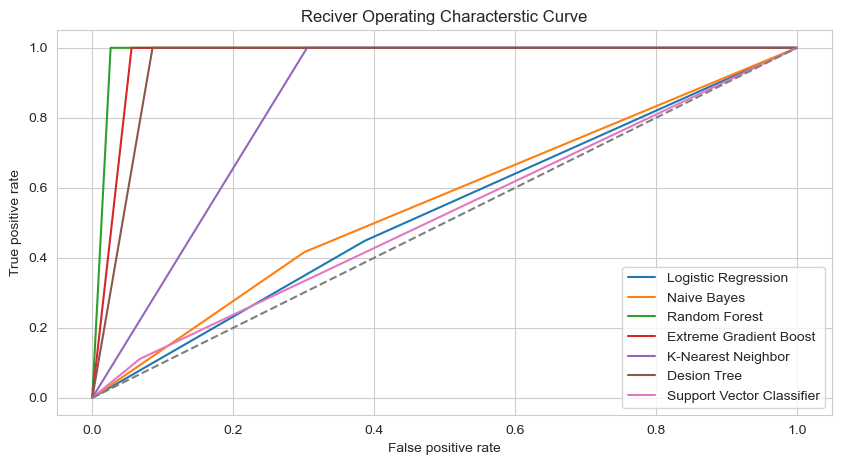

In [78]:
# create roc curve

lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,l_preds)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,g_preds)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,r_preds)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,XG_preds)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,k_preds)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,T_preds)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,s_preds)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [79]:
# compare all model accuracy
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'],
                    'Accuracy': [l_acc_score*100,g_acc_score*100,lr_acc_score*100,xgb_acc_score*100,
                                 k_acc_score*100,t_acc_score*100,s_acc_score*100]})
model_ev = model_ev.set_index('Model', drop=True)
model_ev

,Accuracy
Model,
Logistic Regression,52.909091
Naive Bayes,55.454545
Random Forest,98.727273
Extreme Gradient Boost,97.272727
K-Nearest Neighbour,85.090909
Decision Tree,95.818182
Support Vector Machine,51.272727


<Figure size 1500x1000 with 0 Axes>

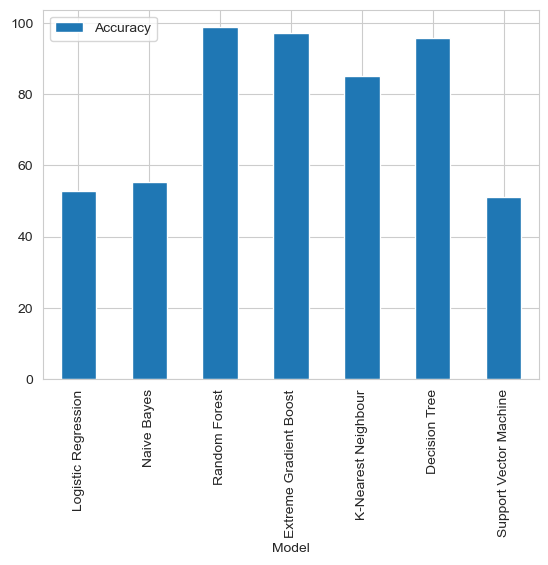

In [80]:
plt.figure(figsize=(15,10))
model_ev.plot.bar()
plt.show()


In [ ]:
# feature selection

<AxesSubplot:>

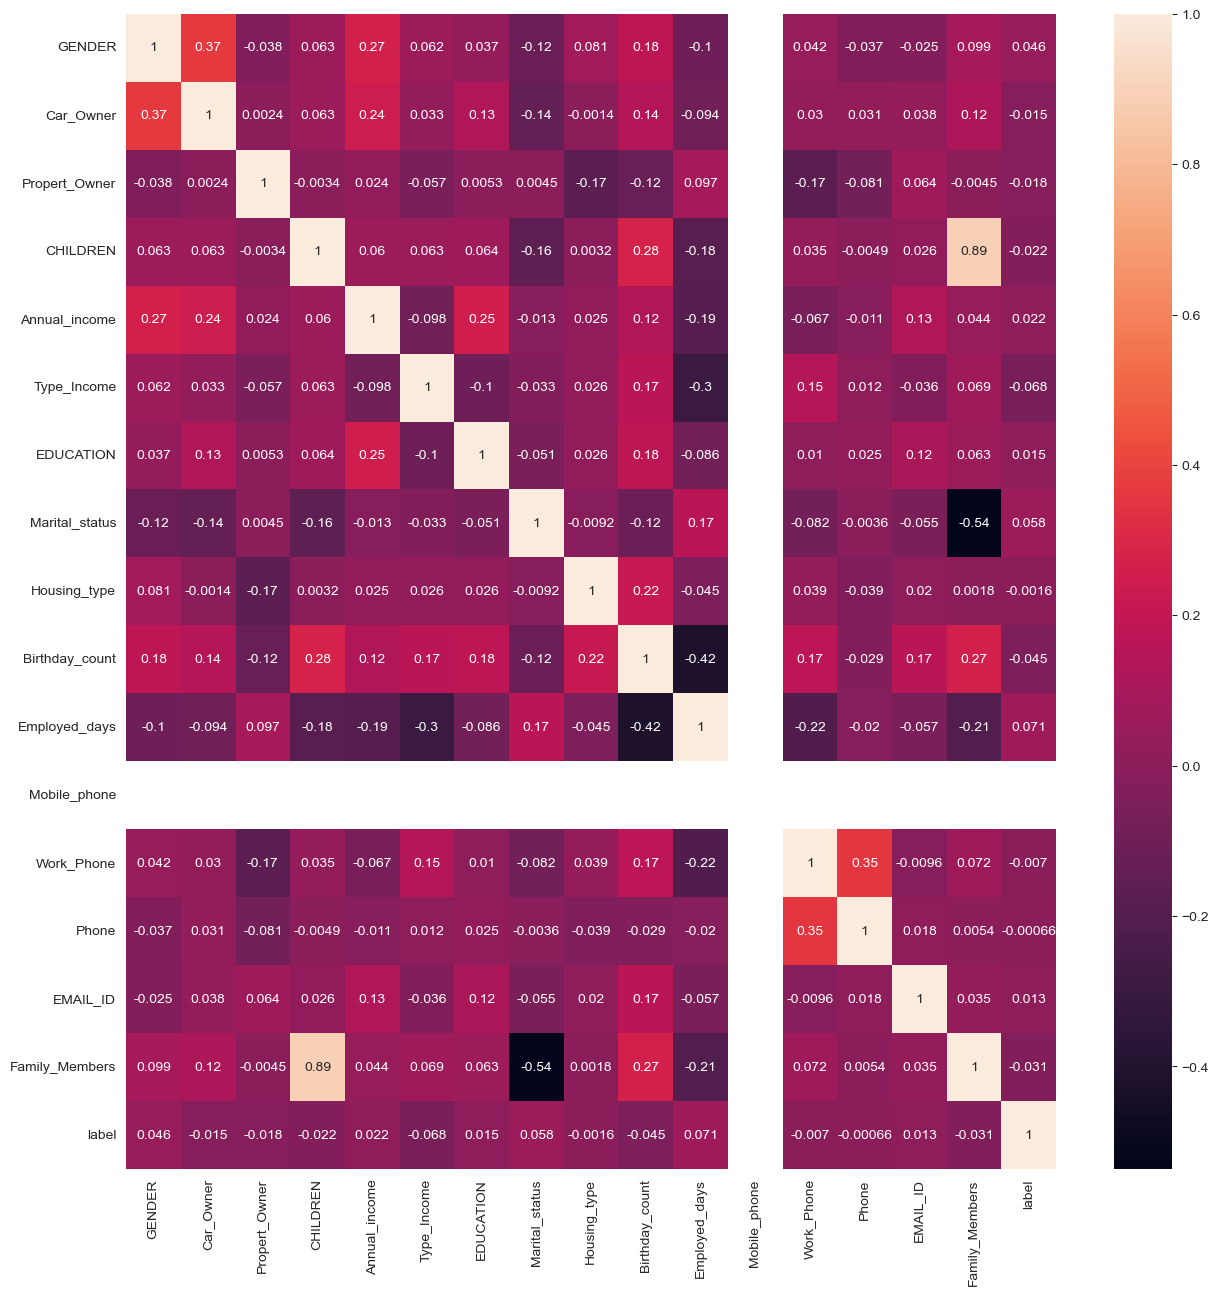

In [81]:
# correlation 
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(data.corr(),annot=True)

In [82]:
# drop constant features
data.drop(columns=['Mobile_phone'],axis=1,inplace=True)

In [83]:
# create derived feature
data['call']=data['Work_Phone']+data['Phone']

In [84]:
def imp (c):
    w=c[0]
    p=c[1]
    

    if p == 1 and w==0:
            return 1
    elif p ==0 and w==1:
            return 2
    elif p ==1 and w==1:
            return 3
    else :
            return 0

In [85]:
data['call']=data[['Work_Phone','Phone']].apply(imp,axis=1)

In [86]:
data.drop(columns=['Work_Phone','Phone'],axis=1,inplace=True)

In [87]:
#drop high correlated fature
data.drop(columns=['CHILDREN'],axis=1,inplace=True)

<AxesSubplot:>

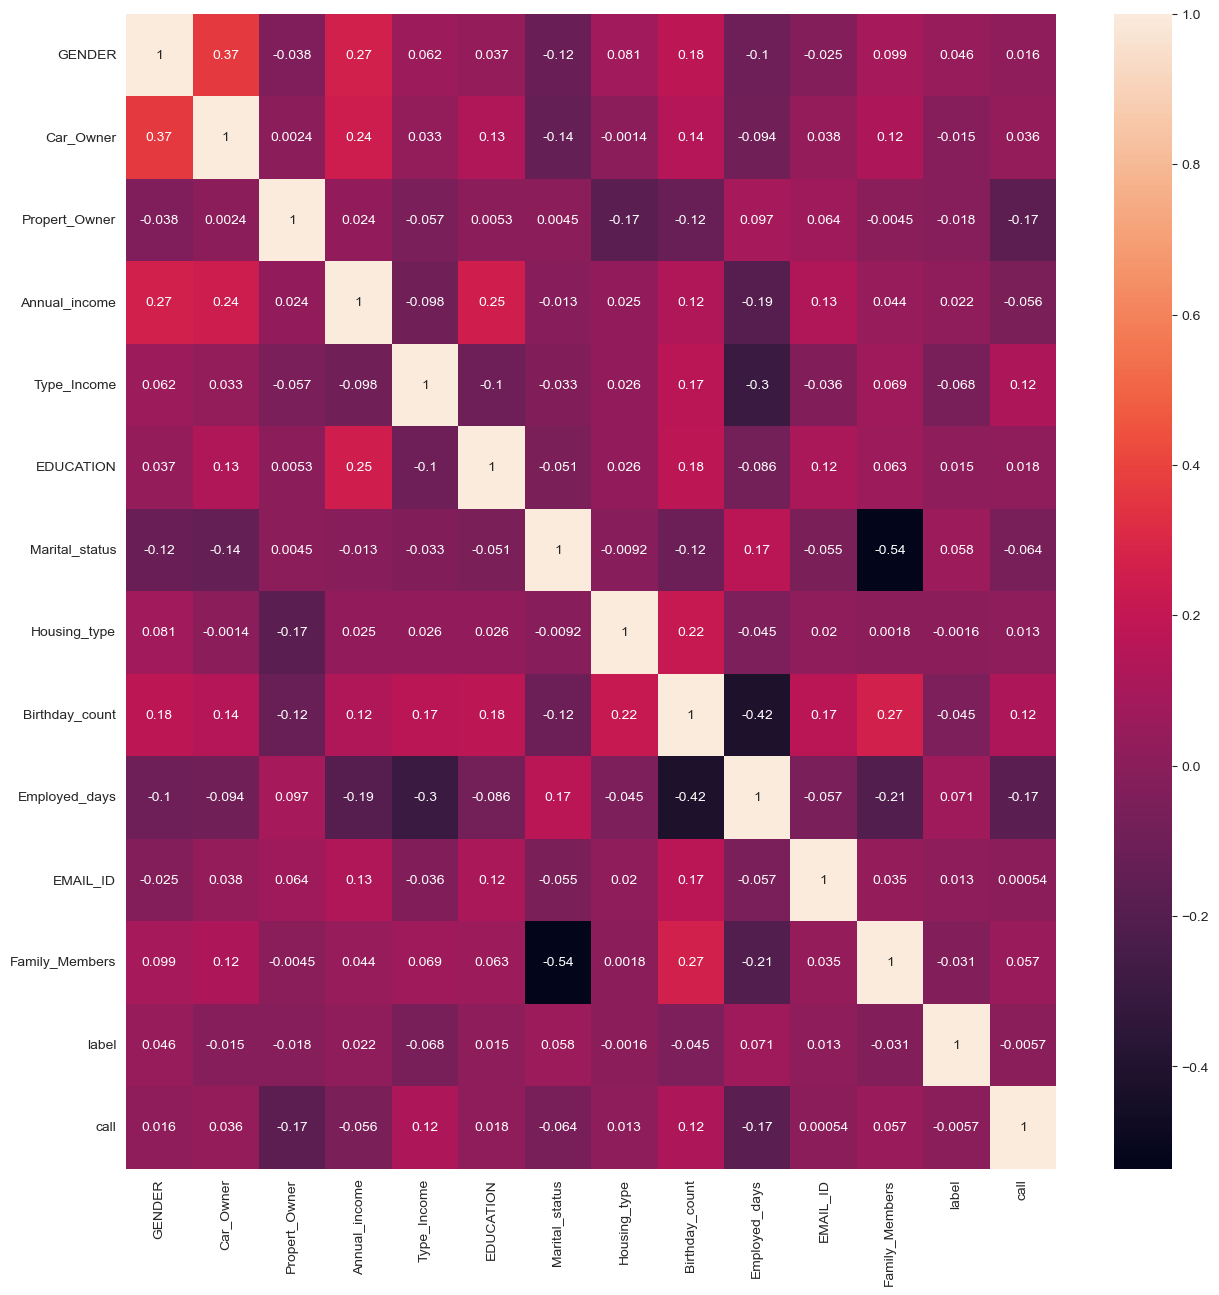

In [88]:
# check coreelation
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(data.corr(),annot=True)

In [89]:
data.head()

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,EMAIL_ID,Family_Members,label,call
0,1,1,1,12.100718,1,3,1,1,-18772.0,7796.5,0,2,1,0
1,0,1,0,12.660331,0,3,1,1,-13557.0,-586.0,0,2,1,3
2,0,1,0,12.660331,0,3,1,1,-15661.5,-586.0,0,2,1,3
3,0,1,0,12.022757,0,3,1,1,-13557.0,-586.0,0,2,1,3
4,0,1,0,12.660331,0,3,1,1,-13557.0,-586.0,0,2,1,3


In [90]:
col=['Annual_income','EDUCATION','Birthday_count','Employed_days','Family_Members','call']

In [91]:
# again sampling and predic the outcome
from imblearn.over_sampling import RandomOverSampler
x=data.drop(['label'],axis=1)
y=data['label']

# scaling

scaler = StandardScaler()
x[col] = scaler.fit_transform(x[col])
x

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,EMAIL_ID,Family_Members,call
0,1,1,1,0.143647,1,1.555348,1,1,-0.651955,1.948330,0,-0.170453,-0.680297
1,0,1,0,1.328616,0,1.555348,1,1,0.590242,0.068679,0,-0.170453,2.132972
2,0,1,0,1.328616,0,1.555348,1,1,0.088957,0.068679,0,-0.170453,2.132972
3,0,1,0,-0.021434,0,1.555348,1,1,0.590242,0.068679,0,-0.170453,2.132972
4,0,1,0,1.328616,0,1.555348,1,1,0.590242,0.068679,0,-0.170453,2.132972
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,0,1,-0.021434,0,1.555348,1,1,0.971358,-0.289201,0,-0.170453,-0.680297
1544,0,0,0,0.616146,0,0.456453,3,1,1.382962,-0.071020,0,-1.225901,-0.680297
1545,1,1,1,0.143647,3,1.555348,1,1,0.681472,-0.355350,0,1.940442,-0.680297
1546,1,1,0,1.002206,3,-0.642442,0,1,0.176970,0.055449,0,-0.170453,2.132972


In [92]:



kf = StratifiedKFold(n_splits=5, shuffle=False)

rm=RandomOverSampler(random_state=44)

x_or,y_or=rm.fit_resample(x,y)

x_train,x_test,y_train,y_test=train_test_split(x_or,y_or,test_size=0.2,random_state=44)

In [93]:
rad_model=RandomForestClassifier(n_estimators=200,random_state=44)

rad_model.fit(x_train,y_train)

r_preds=rad_model.predict(x_test)

score = cross_val_score(rad_model, x_test, y_test, cv=kf, scoring='recall')

print("Cross Validation Recall scores are: {}".format(score))

print("Average Cross Validation Recall score: {}".format(score.mean()))

r_acc_score = accuracy_score(y_test, r_preds)

print("Accuracy :",lr_acc_score*100,'\n')

print(rad_model.score(x_test,y_test))
print(confusion_matrix(y_test,r_preds))
print(classification_report(y_test,r_preds))

Cross Validation Recall scores are: [0.89285714 0.94642857 0.80357143 0.89285714 0.80701754]
Average Cross Validation Recall score: 0.8685463659147871
Accuracy : 98.72727272727273 

0.9872727272727273
[[262   7]
 [  0 281]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       269
           1       0.98      1.00      0.99       281

    accuracy                           0.99       550
   macro avg       0.99      0.99      0.99       550
weighted avg       0.99      0.99      0.99       550



## hyperparameter tuning random forest

hyperparameter tuning is important because it enables us to find the optimal set of hyperparameters for a machine learning model. This can greatly improve the performance of the model and enable it to make more accurate predictions.

In [94]:


from sklearn.model_selection import RandomizedSearchCV
rf_grid = {"n_estimators" : np.arange(10 , 100, 10),
           "max_depth" : [None,3,5,10],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2),
           "max_features" : [0.5,1,"sqrt","auto"],
           "max_samples" : [1000]}
    
rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),
                             random_state=42,
                             param_distributions=rf_grid,
                             n_iter=10,
                             cv=5,
                             verbose=True)    


rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, verbose=True)

In [95]:
# best hyperparameter
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 1000,
 'max_features': 1,
 'max_depth': None}

In [96]:
# predic with best hyperparameter
rad_model=RandomForestClassifier(n_estimators= 100,
 min_samples_split= 12,
 min_samples_leaf= 1,
 max_samples= 1000,
 max_features= 1,
 max_depth= None)

rad_model.fit(x_train,y_train)

r_preds=rad_model.predict(x_test)

score = cross_val_score(RandomForestClassifier(), x_test, y_test, cv=kf, scoring='recall')

print("Cross Validation Recall scores are: {}".format(score))

print("Average Cross Validation Recall score: {}".format(score.mean()))

r_acc_score = accuracy_score(y_test, r_preds)

print("Accuracy :",lr_acc_score*100,'\n')

print('score :',rad_model.score(x_test,y_test))
print(confusion_matrix(y_test,r_preds))
print(classification_report(y_test,r_preds))

Cross Validation Recall scores are: [0.89285714 0.94642857 0.80357143 0.89285714 0.84210526]
Average Cross Validation Recall score: 0.8755639097744361
Accuracy : 98.72727272727273 

score : 0.94
[[251  18]
 [ 15 266]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       269
           1       0.94      0.95      0.94       281

    accuracy                           0.94       550
   macro avg       0.94      0.94      0.94       550
weighted avg       0.94      0.94      0.94       550



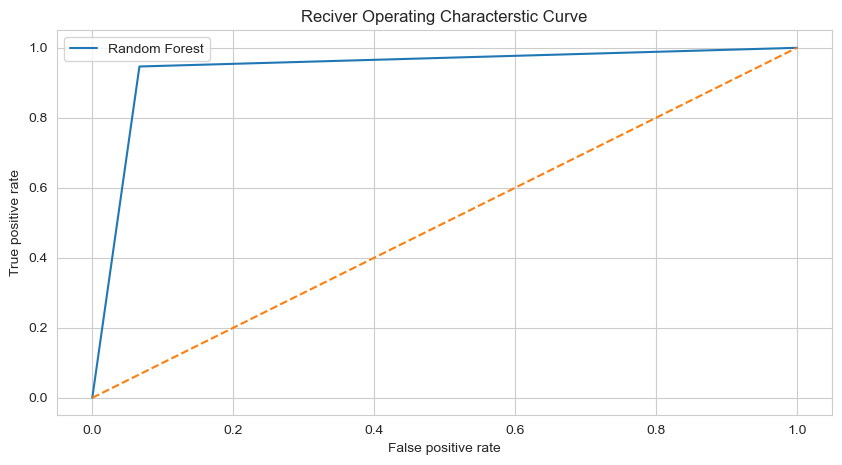

In [97]:
# roc curve
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,r_preds)



sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot([0,1],ls='--')

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [98]:
# again prdeic without tunning 
rad_model=RandomForestClassifier(n_estimators=200,random_state=44)

rad_model.fit(x_train,y_train)

r_preds=rad_model.predict(x_test)

score = cross_val_score(rad_model, x_test, y_test, cv=kf, scoring='recall')

print("Cross Validation Recall scores are: {}".format(score))

print("Average Cross Validation Recall score: {}".format(score.mean()))

r_acc_score = accuracy_score(y_test, r_preds)

print("Accuracy :",lr_acc_score*100,'\n')

print(rad_model.score(x_test,y_test))
print(confusion_matrix(y_test,r_preds))
print(classification_report(y_test,r_preds))

Cross Validation Recall scores are: [0.89285714 0.94642857 0.80357143 0.89285714 0.80701754]
Average Cross Validation Recall score: 0.8685463659147871
Accuracy : 98.72727272727273 

0.9872727272727273
[[262   7]
 [  0 281]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       269
           1       0.98      1.00      0.99       281

    accuracy                           0.99       550
   macro avg       0.99      0.99      0.99       550
weighted avg       0.99      0.99      0.99       550



In [99]:
# save the model
import pickle
filename = 'savedmodel.sav'
pickle.dump(rad_model, open(filename, 'wb'))

In [100]:
y_test

1527    0
208     0
2307    1
562     0
2424    1
       ..
1906    1
2504    1
91      1
2317    1
1092    0
Name: label, Length: 550, dtype: int64

In [101]:
cols_names=pd.DataFrame(y_test,columns=x.columns)
cols_names.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Annual_income', 'Type_Income',
       'EDUCATION', 'Marital_status', 'Housing_type', 'Birthday_count',
       'Employed_days', 'EMAIL_ID', 'Family_Members', 'call'],
      dtype='object')

In [102]:
cols_names.head()

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,EMAIL_ID,Family_Members,call


In [103]:
load_model = pickle.load(open(filename,'rb'))

In [104]:
load_model.predict([[0,1,1,-1.668192,1,-0.642442,1,1,-1.857947,1.948330,0,-0.170453,-0.680297]])

C:\Users\mani\Desktop\sample_pro\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)